In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np

### Loading Dataset 1

In [3]:
import pandas as pd
ames_data = pd.read_csv('ames_data.csv')
print("Ames Housing Dataset loaded successfully!")
print(ames_data.info())
print(ames_data.head())

Ames Housing Dataset loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQua

### Dataset Overview

The dataset consists of 1460 observations (houses) and 81 features. The features capture various aspects of each house, such as the overall quality, number of rooms, year built, garage area, and sale price, among others. The dataset includes both **numeric** (38) and **categorical** (43) features.

#### Key Information:
- **Total observations**: 1460
- **Total features**: 81
- **Numeric features**: 38 (e.g., `LotFrontage`, `GrLivArea`, `GarageCars`)
- **Categorical features**: 43 (e.g., `MSZoning`, `Neighborhood`, `GarageType`)

#### Data Types:
- **Integer and Float**: 38 features including `SalePrice`, `LotFrontage`, `GrLivArea`, and `GarageCars`.
- **Object (Categorical)**: 43 features including `MSZoning`, `Neighborhood`, and `SaleType`.

##### Columns with significant missing values:
- Alley (91 non-null)
- PoolQC (7 non-null)
- Fence (281 non-null)
- MiscFeature (54 non-null) have high proportions of missing data.
- LotFrontage (1,201 non-null) and other features like GarageYrBlt, MasVnrType, and Electrical also have some missing values.

- **Columns with missing values will require cleaning or imputation.**
- **'SalePrice' is the target variable for prediction, and it is numeric with no missing values.**
- Features like OverallQual, GrLivArea, GarageArea, and TotalBsmtSF are likely to have strong predictive power.

In [4]:
print(ames_data.shape)

(1460, 81)


In [5]:
ames_data = ames_data.drop_duplicates()

In [6]:
print(ames_data.shape)

(1460, 81)


**This implies that there are no duplicates in the dataset**

In [7]:
## Let's summarise the datset using describe function.
ames_data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In this step, we explore the dataset to understand its structure. We observe that the dataset contains 38 numerical features, such as 'OverallQual', 'GrLivArea', and 'SalePrice'. Key statistics show that 'SalePrice' has an average value of **$180921.195**, indicating the central tendency of house prices.

In [8]:
#Let's check some of the categorical columns to understand the structure.

In [9]:
ames_data[['MasVnrType', 'MSZoning']]

MasVnrType MSZoning
0       BrkFace       RL
1           NaN       RL
2       BrkFace       RL
3           NaN       RL
4       BrkFace       RL
...         ...      ...
1455        NaN       RL
1456      Stone       RL
1457        NaN       RL
1458        NaN       RL
1459        NaN       RL

[1460 rows x 2 columns]

#### Exploring Missing Data

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

missing_values = ames_data.isnull().sum()
missing_percentage = (missing_values / len(ames_data)) * 100

missing_summary = pd.DataFrame({
    'Feature': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing Percentage': missing_percentage.values
}).sort_values(by='Missing Percentage', ascending=False)

print(missing_summary[missing_summary['Missing Count'] > 0])

         Feature  Missing Count  Missing Percentage
72        PoolQC           1453           99.520548
74   MiscFeature           1406           96.301370
6          Alley           1369           93.767123
73         Fence           1179           80.753425
25    MasVnrType            872           59.726027
57   FireplaceQu            690           47.260274
3    LotFrontage            259           17.739726
59   GarageYrBlt             81            5.547945
64    GarageCond             81            5.547945
58    GarageType             81            5.547945
60  GarageFinish             81            5.547945
63    GarageQual             81            5.547945
35  BsmtFinType2             38            2.602740
32  BsmtExposure             38            2.602740
30      BsmtQual             37            2.534247
31      BsmtCond             37            2.534247
33  BsmtFinType1             37            2.534247
26    MasVnrArea              8            0.547945
42    Electr

#### Missing Data:
Several features contain missing values:
- **LotFrontage**: 259 missing values (17.74%)
- **Alley**: 1369 missing values (93.77%)
- **MasVnrType**: 872 missing values (59.73%)
- **FireplaceQu**: 690 missing values (47.26%)
- **PoolQC**: 1453 missing values (99.52%)
- **Fence**: 1179 missing values (80.75%)
- **MiscFeature**: 1406 missing values (96.30%)

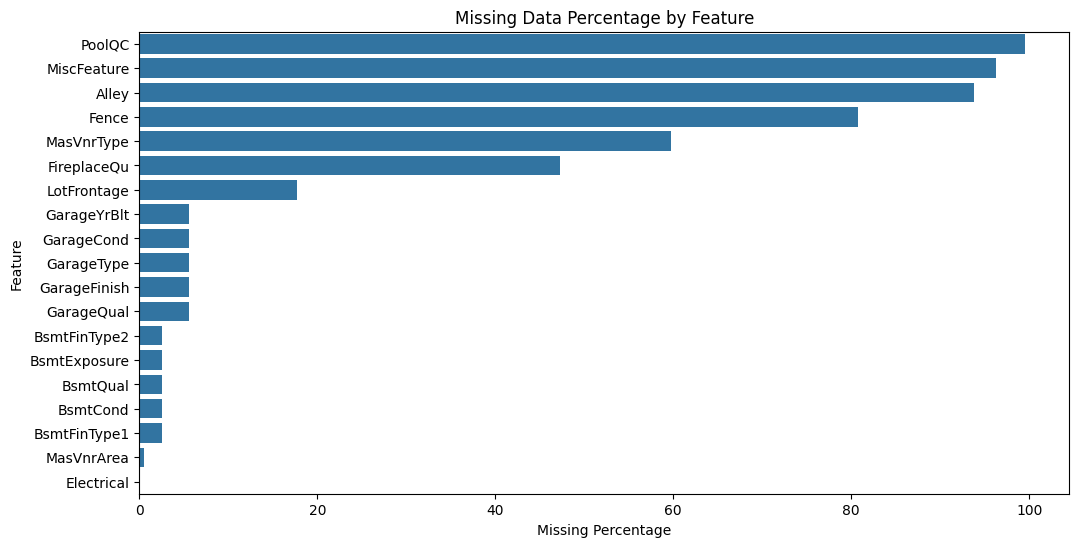

In [11]:
# Visualize missing data
plt.figure(figsize=(12, 6))
sns.barplot(x='Missing Percentage', y='Feature', data=missing_summary[missing_summary['Missing Count'] > 0])
plt.title("Missing Data Percentage by Feature")
plt.xlabel("Missing Percentage")
plt.ylabel("Feature")
plt.show()

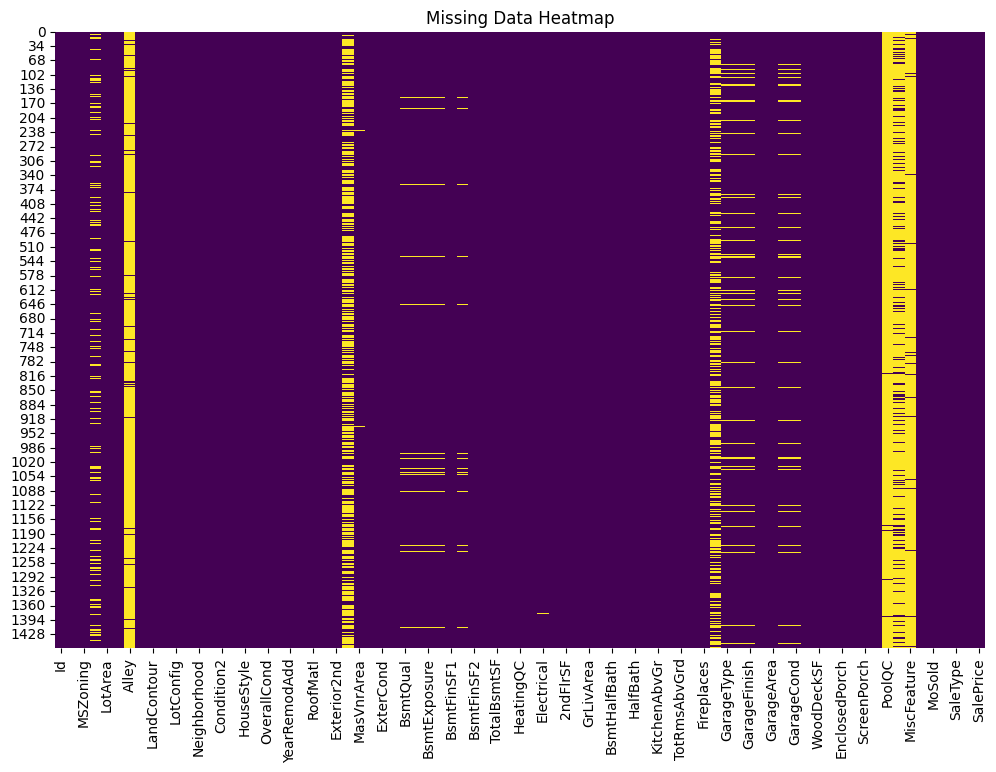

In [12]:
# Missingness heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(ames_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

### Interpreting Missing Values

In [13]:
df = ames_data.copy()

In [14]:
features_na = [features for features in df.columns if df[features].isnull().sum() > 1]

for feature in features_na:
    missing_percentage = np.round(df[feature].isnull().mean() * 100, 2)
    print(f"Feature '{feature}': {missing_percentage}% missing values")

Feature 'LotFrontage': 17.74% missing values
Feature 'Alley': 93.77% missing values
Feature 'MasVnrType': 59.73% missing values
Feature 'MasVnrArea': 0.55% missing values
Feature 'BsmtQual': 2.53% missing values
Feature 'BsmtCond': 2.53% missing values
Feature 'BsmtExposure': 2.6% missing values
Feature 'BsmtFinType1': 2.53% missing values
Feature 'BsmtFinType2': 2.6% missing values
Feature 'FireplaceQu': 47.26% missing values
Feature 'GarageType': 5.55% missing values
Feature 'GarageYrBlt': 5.55% missing values
Feature 'GarageFinish': 5.55% missing values
Feature 'GarageQual': 5.55% missing values
Feature 'GarageCond': 5.55% missing values
Feature 'PoolQC': 99.52% missing values
Feature 'Fence': 80.75% missing values
Feature 'MiscFeature': 96.3% missing values


In [15]:
# Calculate total and percentage of missing values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)

# Combine total and percentage into one DataFrame
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# Display the top 20 features with the most missing data
missing_data.head(20)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
MasVnrType      872  0.597260
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageYrBlt      81  0.055479
GarageCond       81  0.055479
GarageType       81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtFinType2     38  0.026027
BsmtExposure     38  0.026027
BsmtQual         37  0.025342
BsmtCond         37  0.025342
BsmtFinType1     37  0.025342
MasVnrArea        8  0.005479
Electrical        1  0.000685
Id                0  0.000000

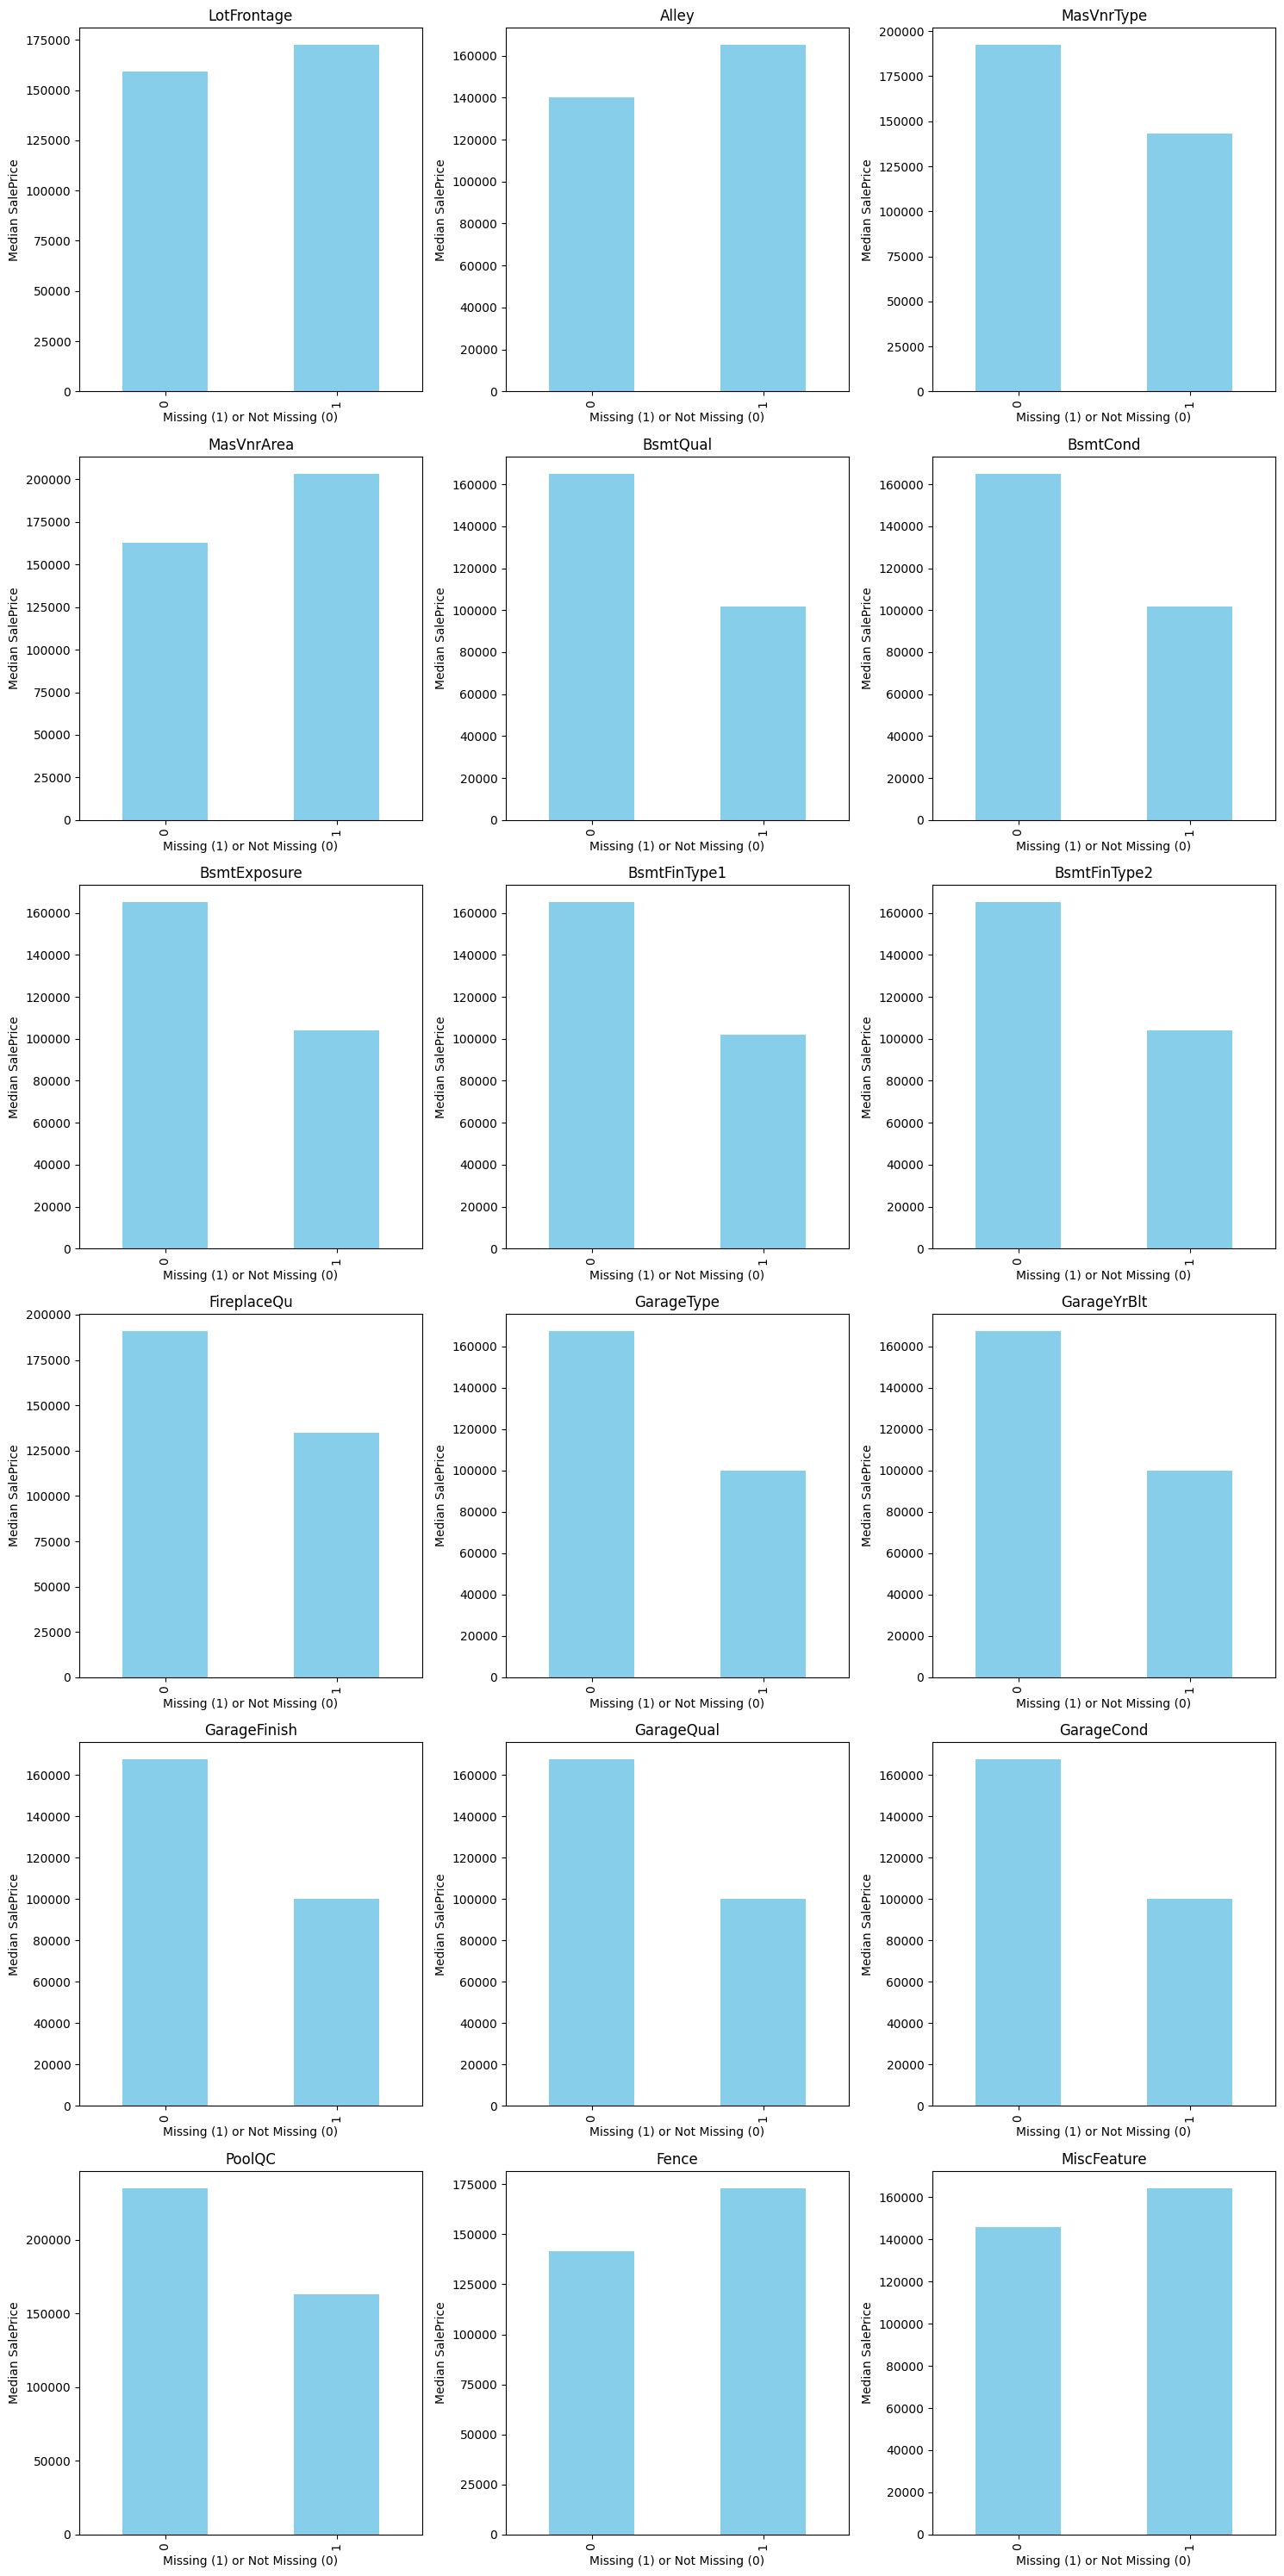

In [16]:
# Number of features to plot
n_features = len(features_na)

# Define the number of rows and columns for the subplot grid
n_cols = 3
n_rows = (n_features // n_cols) + (n_features % n_cols > 0)

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()  # Flattening the axes for easy iteration

# Iterate over each feature and its corresponding subplot axis
for i, feature in enumerate(features_na):
    df1 = ames_data.copy()  # Create a copy of the DataFrame
    df1[feature] = np.where(df1[feature].isnull(), 1, 0)  # 1 if NaN, else 0
    
    # Group by NaN status and plot the median SalePrice
    df1.groupby(feature)['SalePrice'].median().plot.bar(ax=axes[i], color='skyblue')
    
    # Set title and labels
    axes[i].set_title(feature)
    axes[i].set_ylabel('Median SalePrice')
    axes[i].set_xlabel('Missing (1) or Not Missing (0)')
    
# Remove any unused subplot axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

**There is a clear relationship between missing values and the sale price of the house. Therefore, the missing values should be replaced with appropriate and meaningful values.**

##### These are my findings based on the missingness in the data

- PoolQC (99.52%), MiscFeature (96.30%), Alley (93.77%), and Fence (80.75%) have extremely high proportions of missing values. These features may not provide meaningful information and can likely be dropped.
- MasVnrType (59.72%) and FireplaceQu (47.26%) have moderate missing values. These require imputation as they could be valuable for the model (e.g., masonry veneer and fireplaces impact house price).
- Features like LotFrontage (17.73%), GarageYrBlt, GarageCond, and basement-related features have low missing percentages and are important predictors. Imputation methods like KNN, stochastic regression, or group-wise median can be applied to retain these features.

Columns with more than 80% missing values provide limited information and may not contribute meaningfully to the analysis. Let’s remove these columns to reduce noise in the data.

### Data Cleaning

#### Dropping Missing Values

In [17]:
# Drop columns with >80% missing values
high_missing_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
ames_data = ames_data.drop(columns=high_missing_cols)
print("Dropped columns with high missingness:", high_missing_cols)

Dropped columns with high missingness: ['PoolQC', 'MiscFeature', 'Alley', 'Fence']


Now, let's impute numerical features using KNN

Let's fill missing values in numerical columns (LotFrontage, MasVnrArea, GarageYrBlt) using KNN Imputation, which estimates values based on the nearest neighbors in the data.

#### KNN Imputation

In [18]:
from sklearn.impute import KNNImputer
numerical_features = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
knn_imputer = KNNImputer(n_neighbors=5)
ames_data[numerical_features] = knn_imputer.fit_transform(ames_data[numerical_features])
print("Remaining missing values in numerical features:")
print(ames_data[numerical_features].isnull().sum())

Remaining missing values in numerical features:
LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64


Now, let's do encoding first and then iterative imputation to tackle missingness in categorical variables!

#### Encoding Categorical Features

In [19]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
categorical_features = ['MasVnrType', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                        'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 
                        'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical']

encoded_data = pd.get_dummies(ames_data[categorical_features], drop_first=True)
print("Encoded Data Shape:", encoded_data.shape)

Encoded Data Shape: (1460, 44)


The 12 selected categorical features were expanded to 44 columns after one-hot encoding.

#### Applying Iterative Imputation

In [20]:
# Apply Iterative Imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

iterative_imputer = IterativeImputer(max_iter=10, random_state=0)

imputed_data = iterative_imputer.fit_transform(encoded_data)

imputed_df = pd.DataFrame(imputed_data, columns=encoded_data.columns)

print("Iterative Imputation completed.")

Iterative Imputation completed.


In [21]:
## Decode Back to Categorical Features

In [22]:
for feature in categorical_features:
    # Extract relevant one-hot encoded columns for this feature
    feature_encoded_cols = [col for col in encoded_data.columns if feature in col]
    
    # Find the column (category) with the maximum value for each row
    reconstructed_data = imputed_df[feature_encoded_cols].idxmax(axis=1)
    
    # Map encoded column names back to original category values
    category_mapping = {col: col.split('_')[-1] for col in feature_encoded_cols}
    ames_data[feature] = reconstructed_data.map(category_mapping)

print("Decoded imputed data back to categorical format.")

Decoded imputed data back to categorical format.


In [23]:
#Now, let's check whether the data is decoded back properly!

In [24]:
ames_data[['MasVnrType', 'MSZoning']]

MasVnrType MSZoning
0       BrkFace       RL
1       BrkFace       RL
2       BrkFace       RL
3       BrkFace       RL
4       BrkFace       RL
...         ...      ...
1455    BrkFace       RL
1456      Stone       RL
1457    BrkFace       RL
1458    BrkFace       RL
1459    BrkFace       RL

[1460 rows x 2 columns]

In [25]:
print("Remaining missing values in categorical features:")
print(ames_data[categorical_features].isnull().sum())

Remaining missing values in categorical features:
MasVnrType      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
dtype: int64


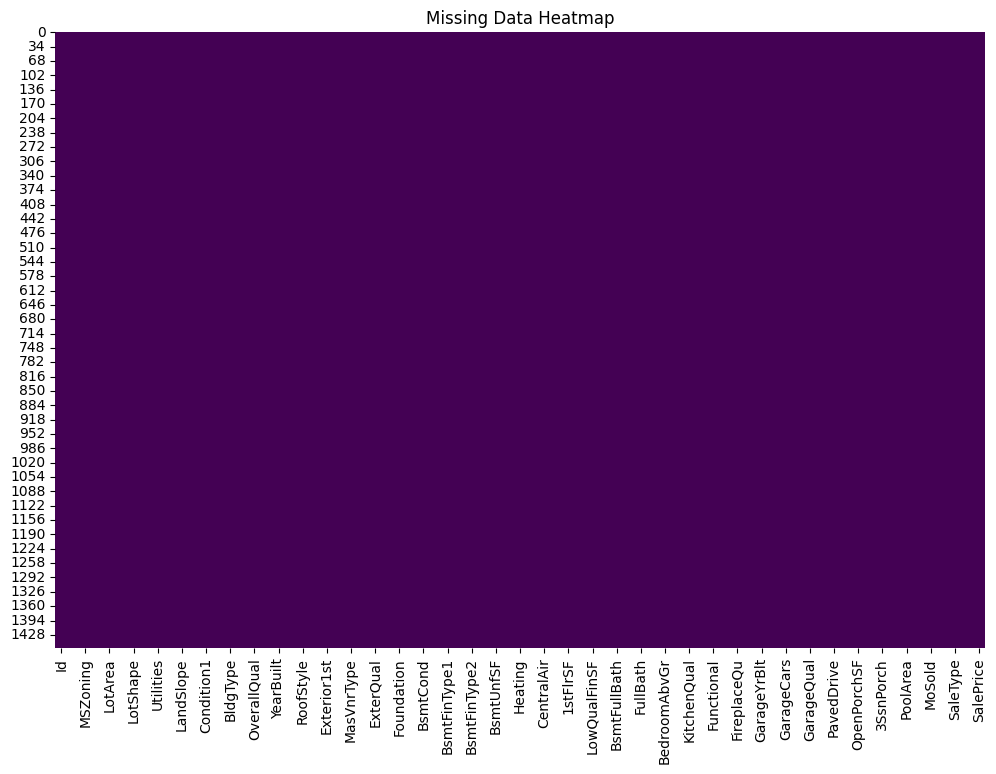

In [26]:
# Missingness heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(ames_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

All the missing values are imputed!

Now, let's create some new features

### Feature Creation

In [27]:
# House Age feature
ames_data['House_Age'] = ames_data['YrSold'] - ames_data['YearBuilt']
ames_data.loc[ames_data['House_Age'] < 0, 'House_Age'] = 0  # Handle negative ages if any

# Create placeholder for inflation-adjusted prices
ames_data['Inflation_Adjusted_Price'] = ames_data['SalePrice']  # To be adjusted using CPI

print("New features created. Sample data:")
print(ames_data[['YrSold', 'YearBuilt', 'House_Age', 'SalePrice', 'Inflation_Adjusted_Price']].head())


New features created. Sample data:
   YrSold  YearBuilt  House_Age  SalePrice  Inflation_Adjusted_Price
0    2008       2003          5     208500                    208500
1    2007       1976         31     181500                    181500
2    2008       2001          7     223500                    223500
3    2006       1915         91     140000                    140000
4    2008       2000          8     250000                    250000


In [28]:
ames_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... ScreenPorch PoolArea MiscVal MoSold YrSold  \
0    AllPub    Inside  ...           0        0       0      2   2008   
1    AllPub       FR2  ...           0        0       0      5   2007   
2    AllPub    Inside  ...           0        0       0      9   2008   
3    AllPub    Corner  ...           0        0       0      2   2006   
4    AllPub       FR2  ...           0        0       0     12   2008   

  SaleType  SaleCondition  SalePrice  House_Age  Inflation_Adjusted_Price  
0       WD         Normal     208500          5                    208500  
1       WD         Normal     181500         31                    181500  
2       WD         Normal     223500          7                    223500  
3       WD        Abnorml     140000         91                    140000  
4       WD         Normal     250000          8                    250000  

[5 rows x 79 columns]

**Inflation adjusted price is currently same as SalePrice but it will be adjusted using CPI later**. Here, I am assuming that the prices are not adjusted. This is reasonable because the Ames Housing SalePrice is likely recorded in nominal terms (prices at the time of sale)

#### Loading GDP data (## Dataset 2)
https://www.multpl.com/us-gdp-inflation-adjusted/table/by-year

In [29]:
# Load GDP data
gdp_data = pd.read_csv(r"C:\Users\Bibin\Downloads\US GDP.csv")
print("GDP Data Sample:")
print(gdp_data.head())

GDP Data Sample:
           Date         GDP Value
0  Jun 30, 2024    23.22 trillion
1  Dec 31, 2023    22.96 trillion
2  Dec 31, 2022    22.25 trillion
3  Dec 31, 2021    21.96 trillion
4  Dec 31, 2020    20.77 trillion


#### Loading CPI data (## Dataset 3)
https://data.worldbank.org/indicator/FP.CPI.TOTL?end=2023&locations=US&start=1960&view=chart

The Consumer Price Index (CPI) is a measure of the average change over time in the prices paid by consumers for goods and services. It's widely used to:
- Track inflation by comparing changes in the cost of living.
- Adjust salaries, pensions, or economic data to account for inflation.
- The CPI value for a base year (often 2010 in modern datasets) is normalized to 100, and other years are measured relative to this base.

In [30]:
# Load CPI data
cpi_data = pd.read_csv(r"C:\Users\Bibin\Downloads\CPI.csv")
print("CPI Data Sample:")
print(cpi_data.head())

CPI Data Sample:
         Data Source World Development Indicators  \
0                NaN                          NaN   
1  Last Updated Date                   13-11-2024   
2                NaN                          NaN   
3       Country Name                 Country Code   
4              Aruba                          ABW   

                          Unnamed: 2      Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0                                NaN             NaN         NaN         NaN   
1                                NaN             NaN         NaN         NaN   
2                                NaN             NaN         NaN         NaN   
3                     Indicator Name  Indicator Code      1960.0      1961.0   
4  Consumer price index (2010 = 100)     FP.CPI.TOTL         NaN         NaN   

   Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  Unnamed: 58  \
0         NaN         NaN         NaN         NaN  ...          NaN   
1         NaN         NaN         NaN    

#### Loading Inflation Data (## Dataset 4)
https://www.multpl.com/inflation/table/by-year

In [31]:
inflation_data = pd.read_csv(r"C:\Users\Bibin\Downloads\US Inflation Rate.csv") 
print("Inflation Data Sample:")
print(inflation_data.head())

Inflation Data Sample:
          Date US Inflation Rate
0  Sep 1, 2024             2.44%
1  Jan 1, 2024             3.09%
2  Jan 1, 2023             6.41%
3  Jan 1, 2022             7.48%
4  Jan 1, 2021             1.40%


In [32]:
## Now, let's formatting the seconday data sources.

#### **Formatting the Secondary Data Sources**

In [33]:
## Let's clean GDP data at first

gdp_data['Year'] = pd.to_datetime(gdp_data['Date']).dt.year  # Extract year
gdp_data['GDP_Value'] = gdp_data['GDP Value'].str.replace('trillion', '').str.replace(' ', '').astype(float)  # Clean GDP values
gdp_data = gdp_data[['Year', 'GDP_Value']]  # Keep only relevant columns

print("Cleaned GDP Data:")
print(gdp_data.head())

Cleaned GDP Data:
   Year  GDP_Value
0  2024      23.22
1  2023      22.96
2  2022      22.25
3  2021      21.96
4  2020      20.77


In [34]:
gdp_data.isnull().sum()

Year         0
GDP_Value    0
dtype: int64

In [35]:
## Now, let's clean inflation data!

inflation_data['Year'] = pd.to_datetime(inflation_data['Date']).dt.year  # Extract year
inflation_data['Inflation_Rate'] = inflation_data['US Inflation Rate'].str.replace('%', '').str.replace(' ', '').astype(float)
inflation_data = inflation_data[['Year', 'Inflation_Rate']]

print("Cleaned Inflation Data:")
print(inflation_data.head())


Cleaned Inflation Data:
   Year  Inflation_Rate
0  2024            2.44
1  2024            3.09
2  2023            6.41
3  2022            7.48
4  2021            1.40


In [36]:
inflation_data.isnull().sum()

Year              0
Inflation_Rate    0
dtype: int64

**Cleaning CPI data is a mammoth task! Let's start.**

In [37]:
# Step 1: Reshape CPI data into long format
cpi_long = cpi_data.iloc[4:].copy()  # Skip the first 4 rows (irrelevant metadata)
cpi_long.columns = cpi_data.iloc[3]  # Assign proper column headers from the 4th row

# Reshape to long format (years as rows)
cpi_long = cpi_long.melt(id_vars=['Country Name'], var_name='Year', value_name='CPI')

# Preview the reshaped data
print("Reshaped CPI Data:")
print(cpi_long.head())

Reshaped CPI Data:
                  Country Name          Year  CPI
0                        Aruba  Country Code  ABW
1  Africa Eastern and Southern  Country Code  AFE
2                  Afghanistan  Country Code  AFG
3   Africa Western and Central  Country Code  AFW
4                       Angola  Country Code  AGO


In [38]:
# Filter for United States
cpi_long = cpi_long[cpi_long['Country Name'] == 'United States']

# 'Year' and 'CPI' columns are numeric
cpi_long['Year'] = pd.to_numeric(cpi_long['Year'], errors='coerce')
cpi_long['CPI'] = pd.to_numeric(cpi_long['CPI'], errors='coerce')

print("Cleaned CPI Data:")
print(cpi_long.head())

Cleaned CPI Data:
       Country Name    Year        CPI
251   United States     NaN        NaN
517   United States     NaN        NaN
783   United States     NaN        NaN
1049  United States  1960.0  13.563061
1315  United States  1961.0  13.708284


In [39]:
print("Cleaned CPI Data Overview:")
print(cpi_long.info())
print("Sample Cleaned CPI Data:")
print(cpi_long.head())

Cleaned CPI Data Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, 251 to 17807
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  67 non-null     object 
 1   Year          64 non-null     float64
 2   CPI           64 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.1+ KB
None
Sample Cleaned CPI Data:
       Country Name    Year        CPI
251   United States     NaN        NaN
517   United States     NaN        NaN
783   United States     NaN        NaN
1049  United States  1960.0  13.563061
1315  United States  1961.0  13.708284


In [40]:
pd.set_option('display.max_rows', None)
print(cpi_long)

        Country Name    Year         CPI
251    United States     NaN         NaN
517    United States     NaN         NaN
783    United States     NaN         NaN
1049   United States  1960.0   13.563061
1315   United States  1961.0   13.708284
1581   United States  1962.0   13.872615
1847   United States  1963.0   14.044590
2113   United States  1964.0   14.224207
2379   United States  1965.0   14.449685
2645   United States  1966.0   14.885354
2911   United States  1967.0   15.298093
3177   United States  1968.0   15.951596
3443   United States  1969.0   16.822934
3709   United States  1970.0   17.805100
3975   United States  1971.0   18.569431
4241   United States  1972.0   19.177075
4507   United States  1973.0   20.361789
4773   United States  1974.0   22.612745
5039   United States  1975.0   24.680261
5305   United States  1976.0   26.098096
5571   United States  1977.0   27.794912
5837   United States  1978.0   29.915931
6103   United States  1979.0   33.282811
6369   United St

In [41]:
# Check for missing values in GDP data
print("Missing values in GDP Data:")
print(gdp_data.isnull().sum())

# Check for missing values in Inflation data
print("\nMissing values in Inflation Data:")
print(inflation_data.isnull().sum())

# Check for missing values in CPI data
print("\nMissing values in CPI Data:")
print(cpi_long.isnull().sum())

Missing values in GDP Data:
Year         0
GDP_Value    0
dtype: int64

Missing values in Inflation Data:
Year              0
Inflation_Rate    0
dtype: int64

Missing values in CPI Data:
Country Name    0
Year            3
CPI             3
dtype: int64


_From my understanding, the missing values likely originated during the melt operation. These rows might not contain valid data (e.g., leftover metadata or malformed entries).I checked this by carefully evaluating the original data. It contains CPI values from the year 1960 to 2023. Thereby, I am dropping these rows_.

In [42]:
cpi_long = cpi_long.dropna(subset=['Year', 'CPI'])
print("Missing values after dropping:")
print(cpi_long.isnull().sum())
print("Cleaned CPI Data:")
print(cpi_long.head())

Missing values after dropping:
Country Name    0
Year            0
CPI             0
dtype: int64
Cleaned CPI Data:
       Country Name    Year        CPI
1049  United States  1960.0  13.563061
1315  United States  1961.0  13.708284
1581  United States  1962.0  13.872615
1847  United States  1963.0  14.044590
2113  United States  1964.0  14.224207


**Let's visualise CPI trends**

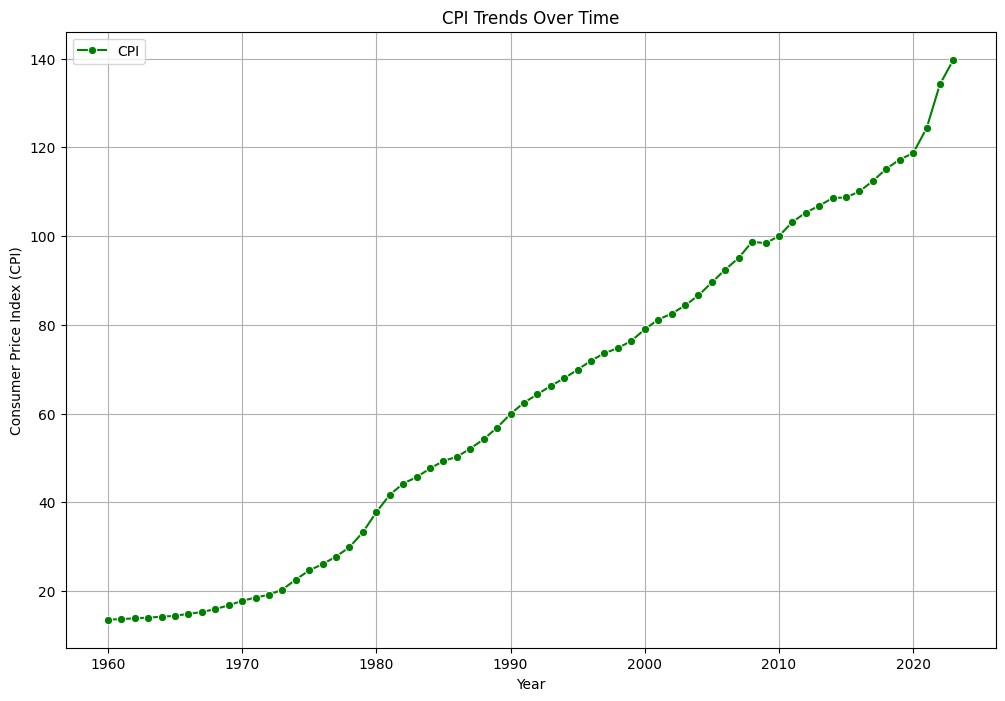

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize CPI Trends Over Time
plt.figure(figsize=(12, 8))
sns.lineplot(data=cpi_long, x='Year', y='CPI', marker='o', color='green', label='CPI')
plt.title('CPI Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Consumer Price Index (CPI)')
plt.grid(True)
plt.legend()
plt.show()

The CPI shows a clear upward trend, indicating inflation over the years. **In the U.S., housing accounts for about 45% of the core CPI basket**.

In [44]:
## Let's handle inflation rate

In [45]:
# At first we can check for duplicate years and their inflation rates
duplicate_years = inflation_data[inflation_data.duplicated(subset='Year', keep=False)]
print("Duplicate Years in Inflation Data:")
print(duplicate_years)

Duplicate Years in Inflation Data:
   Year  Inflation_Rate
0  2024            2.44
1  2024            3.09


Inflation typically fluctuates within a year due to seasonal or economic factors. The first value may reflect conditions at the start of the year, while the second value reflects mid-year trends. Computing the average inflation rate gives a single, representative value for the entire year, which is helpful when we need annual data.

In [46]:
# Aggregate duplicate entries (compute the mean for each year)
inflation_data = inflation_data.groupby('Year', as_index=False).mean()

# Verifying no duplicates remain
print("\nInflation Data After Resolving Duplicates:")
print(inflation_data.head())


Inflation Data After Resolving Duplicates:
   Year  Inflation_Rate
0  1872            1.52
1  1873            2.29
2  1874           -4.40
3  1875           -6.95
4  1876           -5.73


Let's create an interactive plot to understand the trend!

In [47]:
import plotly.express as px

fig = px.line(
    inflation_data,
    x='Year',
    y='Inflation_Rate',
    title='Inflation Rates Over Time',
    labels={'Inflation_Rate': 'Inflation Rate (%)', 'Year': 'Year'},
    markers=True
)

fig.update_traces(
    line=dict(color='blue', width=2),
    marker=dict(size=6, symbol='circle', color='red')
)
fig.update_layout(
    hovermode='x unified',
    title_font=dict(size=22, family='Arial', color='darkblue'),
    xaxis=dict(title='Year', showgrid=True),
    yaxis=dict(title='Inflation Rate (%)', showgrid=True),
    template='plotly_white'
)

fig.show()

The visualization shows high volatility in inflation rates during the earlier years, which stabilizes post-1950.

In [48]:
## Now let's look at the GDP dataset

In [49]:
# Standardize GDP values
gdp_data['GDP_Value'] = gdp_data['GDP_Value'].replace('[^\d\.]', '', regex=True).astype(float)
print("Cleaned GDP Data:")
print(gdp_data.head())


Cleaned GDP Data:
   Year  GDP_Value
0  2024      23.22
1  2023      22.96
2  2022      22.25
3  2021      21.96
4  2020      20.77


In [50]:
print(gdp_data.tail())

    Year  GDP_Value
91  1933       0.88
92  1932       0.89
93  1931       1.02
94  1930       1.09
95  1929       1.19


In [51]:
# Rename the column to include units
gdp_data.rename(columns={'GDP_Value': 'GDP_Value (Trillions)'}, inplace=True)
print(gdp_data.head())

   Year  GDP_Value (Trillions)
0  2024                  23.22
1  2023                  22.96
2  2022                  22.25
3  2021                  21.96
4  2020                  20.77


In [52]:
import altair as alt
import pandas as pd

# An Altair chart for GDP trends
alt_chart = alt.Chart(gdp_data).mark_line(point=True).encode(
    x=alt.X('Year:Q', title='Year'),
    y=alt.Y('GDP_Value (Trillions):Q', title='GDP (in Trillions)'),
    tooltip=['Year', 'GDP_Value (Trillions)']
).properties(
    title='GDP Trends Over Time',
    width=800,
    height=400
).interactive()

alt_chart

alt.Chart(...)

- The GDP shows consistent growth over decades, with major acceleration post-1950.
-  Noticeable slowdowns during the 2008 financial crisis and a strong recovery post-2020.

### Integration of Primary and Secondary Data Sources

For ames_data, the sale year (YrSold) directly corresponds to the transaction, linking the house's price (SalePrice) to macroeconomic indicators like GDP, CPI, and inflation. This makes it the most relevant feature for integration.

In [53]:
# The unique years in YrSold from Ames Housing
print("Unique Years in Ames Housing (YrSold):")
print(ames_data['YrSold'].unique())

# The range of YrSold
print("\nRange of Years in Ames Housing:")
print(f"Min Year: {ames_data['YrSold'].min()}, Max Year: {ames_data['YrSold'].max()}")

Unique Years in Ames Housing (YrSold):
[2008 2007 2006 2009 2010]

Range of Years in Ames Housing:
Min Year: 2006, Max Year: 2010


In [54]:
# Check the unique years in YearBuilt from Ames Housing
print("Unique Years in Ames Housing (YrBuilt):")
print(ames_data['YearBuilt'].unique())

# Check the range of YearBuilt
print("\nRange of Years in Ames Housing:")
print(f"Min Year: {ames_data['YearBuilt'].min()}, Max Year: {ames_data['YearBuilt'].max()}")

Unique Years in Ames Housing (YrBuilt):
[2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

Range of Years in Ames Housing:
Min Year: 1872, Max Year: 2010


- Ames Housing (YrSold) spans 2006 to 2010.
- This confirms that our secondary datasets (CPI, Inflation, GDP) should also be filtered to this timeframe.

In [55]:
# Filter CPI data
cpi_filtered = cpi_long[(cpi_long['Year'] >= 2006) & (cpi_long['Year'] <= 2010)]

# Filter Inflation data
inflation_filtered = inflation_data[(inflation_data['Year'] >= 2006) & (inflation_data['Year'] <= 2010)]

# Filter GDP data
gdp_filtered = gdp_data[(gdp_data['Year'] >= 2006) & (gdp_data['Year'] <= 2010)]

# Verify filtered datasets
print("Filtered CPI Data:")
print(cpi_filtered)

print("\nFiltered Inflation Data:")
print(inflation_filtered)

print("\nFiltered GDP Data:")
print(gdp_filtered)

Filtered CPI Data:
        Country Name    Year         CPI
13285  United States  2006.0   92.449705
13551  United States  2007.0   95.086992
13817  United States  2008.0   98.737477
14083  United States  2009.0   98.386420
14349  United States  2010.0  100.000000

Filtered Inflation Data:
     Year  Inflation_Rate
134  2006            3.99
135  2007            2.08
136  2008            4.28
137  2009            0.03
138  2010            2.63

Filtered GDP Data:
    Year  GDP_Value (Trillions)
14  2010                  16.96
15  2009                  16.50
16  2008                  16.49
17  2007                  16.92
18  2006                  16.56


In [56]:
ames_data.to_csv("ames_data_cleaned.csv", index=False)

In [57]:
# Merge CPI with Ames Housing
ames_data = ames_data.merge(cpi_filtered[['Year', 'CPI']], left_on='YrSold', right_on='Year', how='left')

# Merge Inflation with Ames Housing
ames_data = ames_data.merge(inflation_filtered[['Year', 'Inflation_Rate']], left_on='YrSold', right_on='Year', how='left')

# Merge GDP with Ames Housing
ames_data = ames_data.merge(gdp_filtered[['Year', 'GDP_Value (Trillions)']], left_on='YrSold', right_on='Year', how='left')

In [58]:
# Check the column names in the dataset
print("Columns in the merged Ames dataset:")
print(ames_data.columns)

Columns in the merged Ames dataset:
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'Gara

In [59]:
# Dropping redundant year columns
ames_data = ames_data.drop(columns=['Year_x', 'Year_y', 'Year'])

# Verifying the cleaned dataset
print("Columns in the cleaned Ames dataset:")
print(ames_data.columns)


Columns in the cleaned Ames dataset:
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'Gar

#### Create Inflation Adjusted Price

In [60]:
# Using 2010 CPI as the base (100)
base_cpi = cpi_filtered[cpi_filtered['Year'] == 2010]['CPI'].values[0]

# Calculate Inflation Adjusted Price
ames_data['Inflation_Adjusted_Price'] = ames_data['SalePrice'] * (base_cpi / ames_data['CPI'])

# Preview the dataset with the new column
print("Sample Data with Inflation Adjusted Price:")
print(ames_data[['YrSold', 'SalePrice', 'CPI', 'Inflation_Adjusted_Price']].head())

Sample Data with Inflation Adjusted Price:
   YrSold  SalePrice        CPI  Inflation_Adjusted_Price
0    2008     208500  98.737477             211166.018731
1    2007     181500  95.086992             190877.842970
2    2008     223500  98.737477             226357.818640
3    2006     140000  92.449705             151433.690220
4    2008     250000  98.737477             253196.665145


In [61]:
ames_data.to_csv('ames_merged_data.csv', index=False)

The formula used to calculate the Inflation Adjusted Price is:
$$Inflation Adjusted Price = SalePrice * (Base CPI (2010) / CPI for YrSold)$$

For 2006–2008, inflation-adjusted prices are slightly higher than nominal prices due to lower CPI values relative to 2010.

### Exploratory Data Analysis and Visualisations

##### Visualization 1: Nominal vs. Inflation-Adjusted Prices

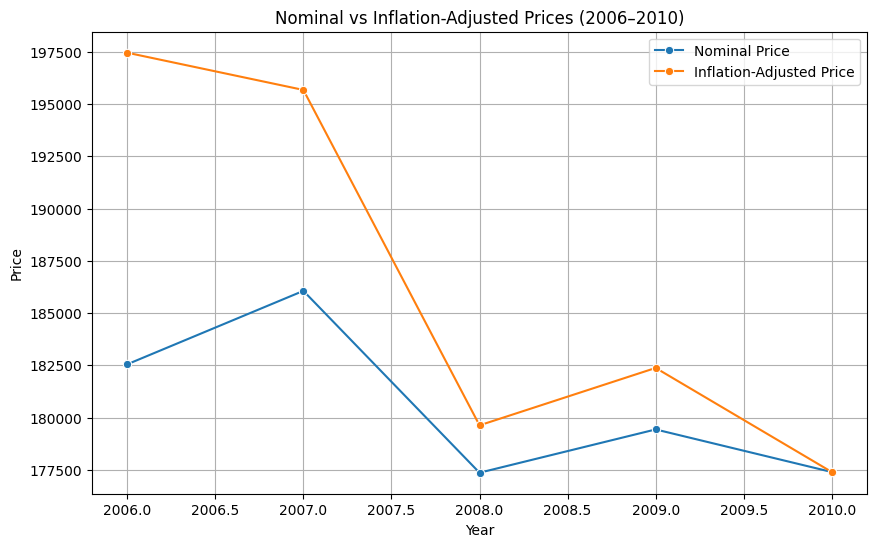

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

price_comparison = ames_data.groupby('YrSold').agg(
    Avg_SalePrice=('SalePrice', 'mean'),
    Avg_Inflation_Adjusted_Price=('Inflation_Adjusted_Price', 'mean')
).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=price_comparison, x='YrSold', y='Avg_SalePrice', marker='o', label='Nominal Price')
sns.lineplot(data=price_comparison, x='YrSold', y='Avg_Inflation_Adjusted_Price', marker='o', label='Inflation-Adjusted Price')
plt.title('Nominal vs Inflation-Adjusted Prices (2006–2010)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

- Both the nominal and inflation-adjusted prices exhibit a downward trend from 2007 to 2008, potentially influenced by the 2008 financial crisis.
- A slight recovery is observed in 2009, aligning with economic stabilization post-crisis.

##### Visualisation 2: Correlation Heatmap

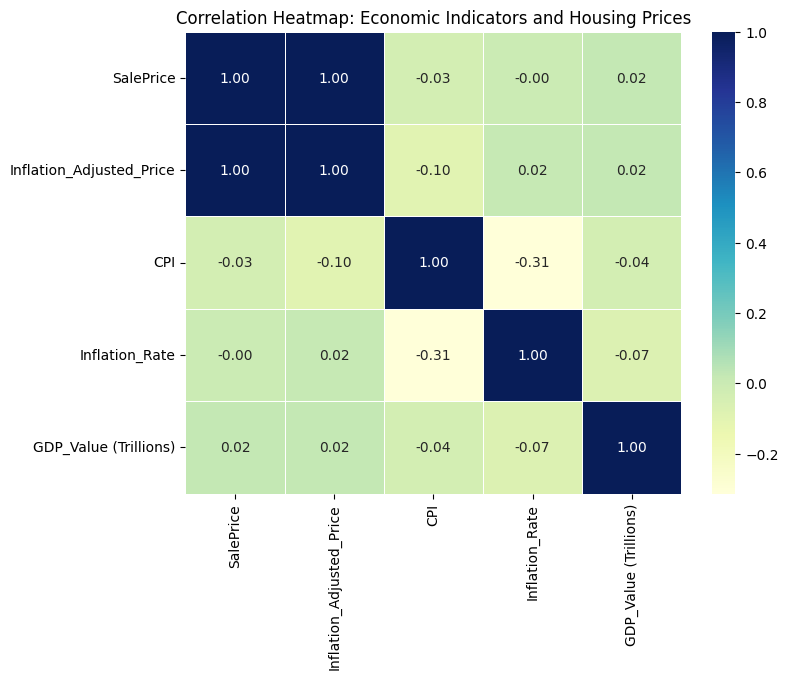

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting some relevant columns for correlation
correlation_data = ames_data[['SalePrice', 'Inflation_Adjusted_Price', 'CPI', 'Inflation_Rate', 'GDP_Value (Trillions)']]

correlation_matrix = correlation_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Economic Indicators and Housing Prices')
plt.show()

- SalePrice vs. Inflation_Adjusted_Price: Strong positive correlation (1.00), as expected since the adjusted price is derived from the nominal price.
- CPI's weak negative correlation with both SalePrice (-0.03) and Inflation_Adjusted_Price (-0.10), suggests that changes in CPI do not significantly affect housing prices in this timeframe.
- Inflation rate has almost no correlation with housing prices (close to 0), indicating inflation fluctuations were likely not a key driver of housing price changes between 2006–2010.
- GDP has weak positive correlation with both SalePrice (0.02) and Inflation_Adjusted_Price (0.02). It only reflects a minor relationship between economic growth and housing prices.

The lack of strong correlations suggests that macroeconomic factors alone do not fully explain housing price trends in the Ames Housing dataset during 2006–2010.

In [64]:
### Now, let’s start with univariate analysis of SalePrice and Inflation_Adjusted_Price.

#### SalePrice Distribution

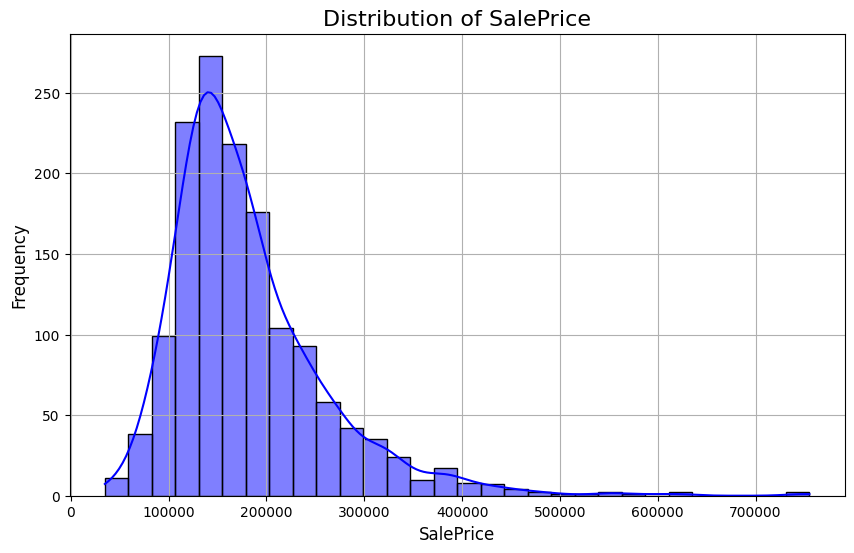

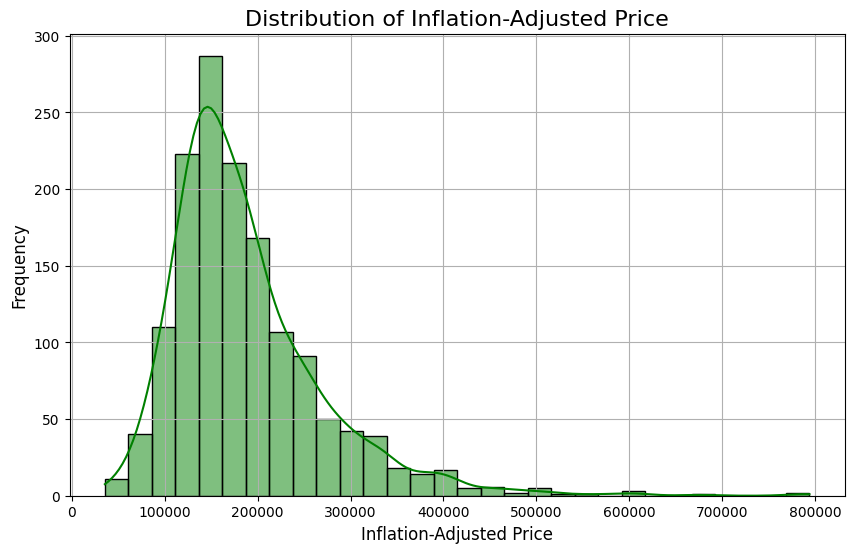

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(ames_data['SalePrice'], kde=True, bins=30, color='blue')
plt.title('Distribution of SalePrice', fontsize=16)
plt.xlabel('SalePrice', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

# Distribution of Inflation_Adjusted_Price
plt.figure(figsize=(10, 6))
sns.histplot(ames_data['Inflation_Adjusted_Price'], kde=True, bins=30, color='green')
plt.title('Distribution of Inflation-Adjusted Price', fontsize=16)
plt.xlabel('Inflation-Adjusted Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

##### Distribution of SalePrice:

The SalePrice distribution is right-skewed, indicating that most houses are priced under $200,000, with a few high-value properties driving the long tail.
The skewness suggests that the SalePrice variable may benefit from a log transformation during modeling to normalize the distribution.

##### Distribution of Inflation-Adjusted Price:

The Inflation_Adjusted_Price shows a slightly smoother distribution compared to the nominal SalePrice. The adjustment has reduced some of the right skewness, aligning prices more with the economic value at that time.

In [66]:
print(ames_data.head(5).T)

                                      0             1             2  \
Id                                    1             2             3   
MSSubClass                           60            20            60   
MSZoning                             RL            RL            RL   
LotFrontage                        65.0          80.0          68.0   
LotArea                            8450          9600         11250   
Street                             Pave          Pave          Pave   
LotShape                            Reg           Reg           IR1   
LandContour                         Lvl           Lvl           Lvl   
Utilities                        AllPub        AllPub        AllPub   
LotConfig                        Inside           FR2        Inside   
LandSlope                           Gtl           Gtl           Gtl   
Neighborhood                    CollgCr       Veenker       CollgCr   
Condition1                         Norm         Feedr          Norm   
Condit

In [67]:
# Select only numeric columns
numeric_data = ames_data.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Extract correlations with SalePrice and Inflation_Adjusted_Price
correlations = correlation_matrix[['SalePrice', 'Inflation_Adjusted_Price']].reset_index()
correlations = correlations.rename(columns={'index': 'Feature'})

# Melt data for tidy format
tidy_correlations = correlations.melt(
    id_vars='Feature', 
    var_name='Target', 
    value_name='Correlation'
)

# Create Altair plot
correlation_plot = alt.Chart(tidy_correlations).mark_bar().encode(
    x=alt.X('Correlation:Q', title='Correlation'),
    y=alt.Y('Feature:N', sort='-x', title='Feature'),
    color=alt.condition(
        alt.datum.Correlation > 0,
        alt.value('steelblue'),  # Positive correlations
        alt.value('orange')     # Negative correlations
    ),
    tooltip=['Feature', 'Target', 'Correlation']
).properties(
    width=300
).facet(
    column=alt.Column('Target:N', title='Target Variable')
)

# Display the chart
correlation_plot

alt.FacetChart(...)

In [68]:
# Select numerical features
numerical_features = ames_data.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numerical_features.corr()

# Extract correlations with SalePrice and Inflation_Adjusted_Price
saleprice_correlations = correlation_matrix['SalePrice'].sort_values(ascending=False)
inflation_price_correlations = correlation_matrix['Inflation_Adjusted_Price'].sort_values(ascending=False)

# Top 10 positively and negatively correlated features
top_positive_saleprice = saleprice_correlations.head(10)
top_positive_inflation = inflation_price_correlations.head(10)

top_negative_saleprice = saleprice_correlations.tail(10).sort_values(ascending=True)
top_negative_inflation = inflation_price_correlations.tail(10).sort_values(ascending=True)

# Print results
print("Top 10 Positively Correlated Features with SalePrice (Descending):")
print(top_positive_saleprice)

print("\nTop 10 Positively Correlated Features with Inflation_Adjusted_Price (Descending):")
print(top_positive_inflation)

print("\nTop 10 Negatively Correlated Features with SalePrice (Descending):")
print(top_negative_saleprice)

print("\nTop 10 Negatively Correlated Features with Inflation_Adjusted_Price (Descending):")
print(top_negative_inflation)

Top 10 Positively Correlated Features with SalePrice (Descending):
SalePrice                   1.000000
Inflation_Adjusted_Price    0.997555
OverallQual                 0.790982
GrLivArea                   0.708624
GarageCars                  0.640409
GarageArea                  0.623431
TotalBsmtSF                 0.613581
1stFlrSF                    0.605852
FullBath                    0.560664
TotRmsAbvGrd                0.533723
Name: SalePrice, dtype: float64

Top 10 Positively Correlated Features with Inflation_Adjusted_Price (Descending):
Inflation_Adjusted_Price    1.000000
SalePrice                   0.997555
OverallQual                 0.788468
GrLivArea                   0.708685
GarageCars                  0.640219
GarageArea                  0.621600
TotalBsmtSF                 0.611120
1stFlrSF                    0.603798
FullBath                    0.560224
TotRmsAbvGrd                0.533454
Name: Inflation_Adjusted_Price, dtype: float64

Top 10 Negatively Correlated F

##### Positively Correlated Features:
- OverallQual, GrLivArea, GarageCars, GarageArea, 1stFlrSF, FullBath, YearBuilt & YearRemodAdd, TotRmsAbvGrd are strongly correlated with both SalePrice and Inflation_Adjusted_Price, indicating their importance in determining house value.

##### Negatively Correlated Features:
- House_Age: Strong negative correlation, reaffirming that older houses tend to lose value over time.
- EnclosedPorch: Moderate negative correlation, possibly indicating that enclosed spaces aren't highly desirable.
- KitchenAbvGr: The number of kitchens above grade negatively impacts pricing, likely due to less need for multiple kitchens.
- Features like CPI, YrSold, and MiscVal have minimal or negligible impact on price.

In [69]:
import hiplot as hip

# Adding color based on SalePrice to see how features impact prices
hip_df = df[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']]
hip_df['SalePrice_Category'] = pd.qcut(hip_df['SalePrice'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Display the HiPlot with color-coded sale price categories
hip.Experiment.from_dataframe(hip_df).display()

<IPython.core.display.Javascript object>

In [70]:
# Extract features with correlation > 0.5 for SalePrice
high_positive_saleprice = saleprice_correlations[saleprice_correlations > 0.5]

# Extract features with correlation > 0.5 for Inflation_Adjusted_Price
high_positive_inflation = inflation_price_correlations[inflation_price_correlations > 0.5]

# Display results
print("Features with Correlation > 0.5 with SalePrice:")
print(high_positive_saleprice)

print("\nFeatures with Correlation > 0.5 with Inflation_Adjusted_Price:")
print(high_positive_inflation)

Features with Correlation > 0.5 with SalePrice:
SalePrice                   1.000000
Inflation_Adjusted_Price    0.997555
OverallQual                 0.790982
GrLivArea                   0.708624
GarageCars                  0.640409
GarageArea                  0.623431
TotalBsmtSF                 0.613581
1stFlrSF                    0.605852
FullBath                    0.560664
TotRmsAbvGrd                0.533723
YearBuilt                   0.522897
YearRemodAdd                0.507101
Name: SalePrice, dtype: float64

Features with Correlation > 0.5 with Inflation_Adjusted_Price:
Inflation_Adjusted_Price    1.000000
SalePrice                   0.997555
OverallQual                 0.788468
GrLivArea                   0.708685
GarageCars                  0.640219
GarageArea                  0.621600
TotalBsmtSF                 0.611120
1stFlrSF                    0.603798
FullBath                    0.560224
TotRmsAbvGrd                0.533454
YearBuilt                   0.521211
YearR

In [71]:
# Extract features with correlation > 0.5 for SalePrice
high_positive_saleprice = saleprice_correlations[saleprice_correlations > 0.5]

# Extract features with correlation > 0.5 for Inflation_Adjusted_Price
high_positive_inflation = inflation_price_correlations[inflation_price_correlations > 0.5]

# Extract top 3 negative correlations for SalePrice
top_negative_saleprice = saleprice_correlations.sort_values().head(3)

# Extract top 3 negative correlations for Inflation_Adjusted_Price
top_negative_inflation = inflation_price_correlations.sort_values().head(3)

# Display results
print("Features with Correlation > 0.5 with SalePrice:")
print(high_positive_saleprice)

print("\nFeatures with Correlation > 0.5 with Inflation_Adjusted_Price:")
print(high_positive_inflation)

print("\nTop 3 Negatively Correlated Features with SalePrice:")
print(top_negative_saleprice)

print("\nTop 3 Negatively Correlated Features with Inflation_Adjusted_Price:")
print(top_negative_inflation)

Features with Correlation > 0.5 with SalePrice:
SalePrice                   1.000000
Inflation_Adjusted_Price    0.997555
OverallQual                 0.790982
GrLivArea                   0.708624
GarageCars                  0.640409
GarageArea                  0.623431
TotalBsmtSF                 0.613581
1stFlrSF                    0.605852
FullBath                    0.560664
TotRmsAbvGrd                0.533723
YearBuilt                   0.522897
YearRemodAdd                0.507101
Name: SalePrice, dtype: float64

Features with Correlation > 0.5 with Inflation_Adjusted_Price:
Inflation_Adjusted_Price    1.000000
SalePrice                   0.997555
OverallQual                 0.788468
GrLivArea                   0.708685
GarageCars                  0.640219
GarageArea                  0.621600
TotalBsmtSF                 0.611120
1stFlrSF                    0.603798
FullBath                    0.560224
TotRmsAbvGrd                0.533454
YearBuilt                   0.521211
YearR

##### Scatter Plot: Exploring Relationship Between Top Correlated Features and SalePrice

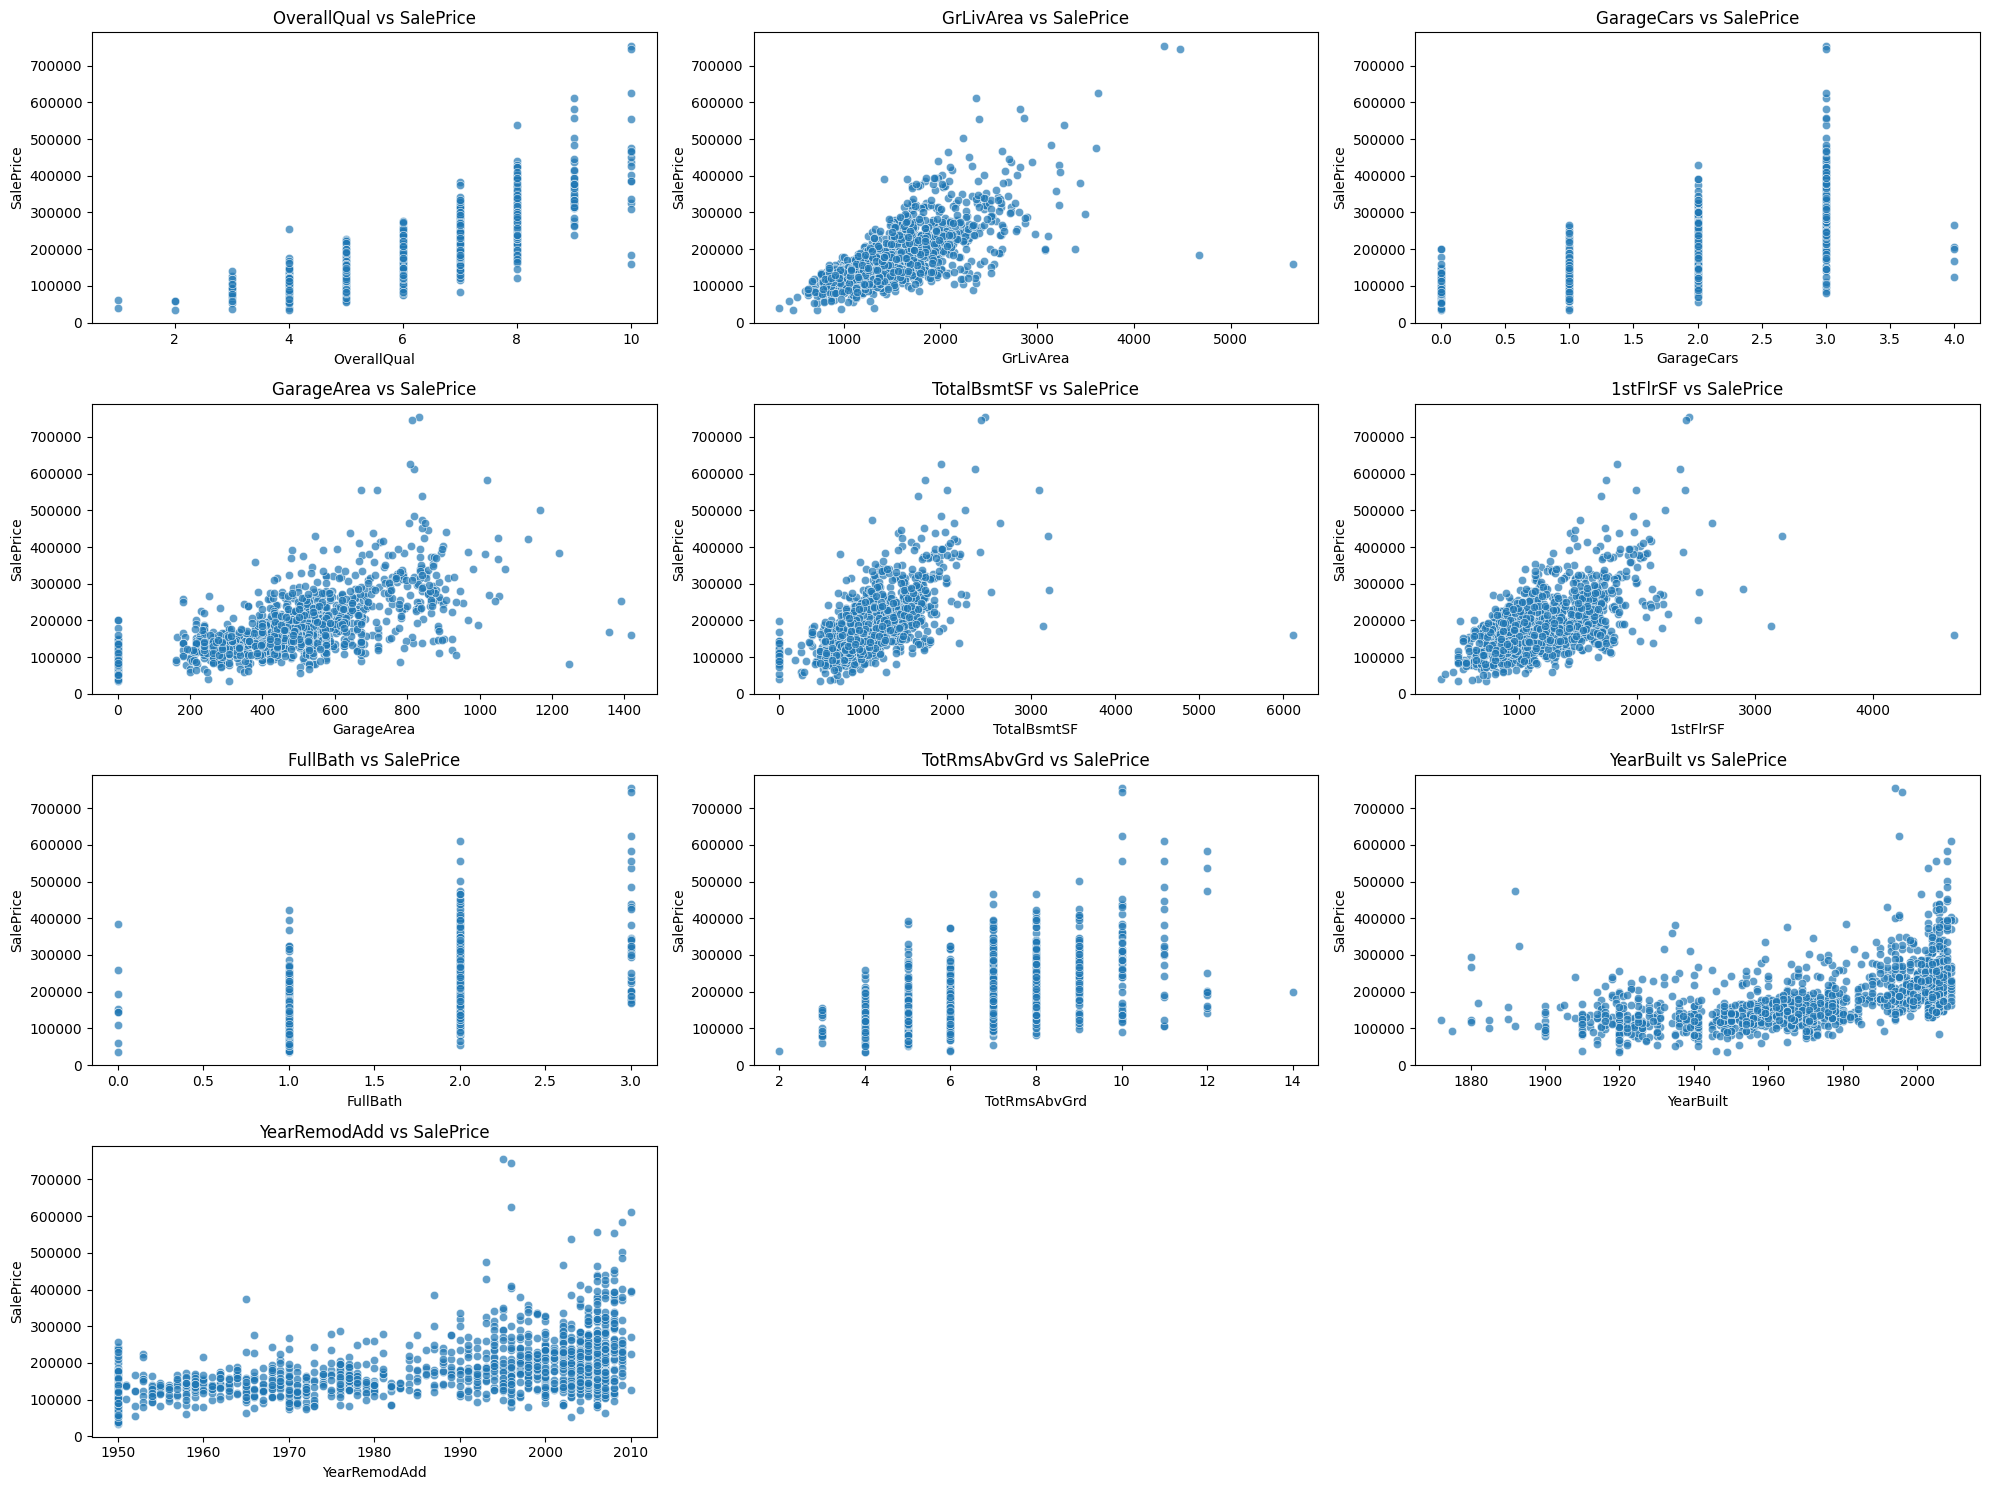

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the top 10 features
top_10_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 
                   'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 
                   'YearBuilt', 'YearRemodAdd']

# Create scatter plots
fig, axes = plt.subplots(4, 3, figsize=(20, 15))
axes = axes.ravel()

for i, feature in enumerate(top_10_features):
    sns.scatterplot(
        x=ames_data[feature],
        y=ames_data['SalePrice'],
        ax=axes[i],
        alpha=0.7
    )
    axes[i].set_title(f"{feature} vs SalePrice")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("SalePrice")

# Remove extra subplots
for j in range(len(top_10_features), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

- OverallQual vs SalePrice: A strong positive linear trend is visible, indicating that higher quality ratings significantly increase the sale price.
- GrLivArea vs SalePrice: A clear positive correlation with some outliers for houses with extremely large living areas.
- GarageCars vs SalePrice: SalePrice increases with the number of garage cars, but there are noticeable plateaus where many houses have the same SalePrice for a given number of GarageCars.
- GarageArea vs SalePrice: A linear trend exists; however, some outliers for large garages appear not to follow the trend.
- TotalBsmtSF vs SalePrice: SalePrice rises with the basement area, but houses with zero basement space form a distinct cluster.
- 1stFlrSF vs SalePrice: A moderately strong positive correlation, though outliers at higher square footages exist.
- FullBath vs SalePrice: Discrete increments in FullBath values show corresponding increases in SalePrice, though the correlation is not as strong.
- TotRmsAbvGrd vs SalePrice: SalePrice generally increases with more rooms, though variability increases at higher room counts.
- YearBuilt vs SalePrice: Newer houses (built more recently) tend to have higher SalePrices.
- YearRemodAdd vs SalePrice: Renovated houses show a slight positive correlation with SalePrice.

In [73]:
### Log Transformation to positively skewed features and Sales Price

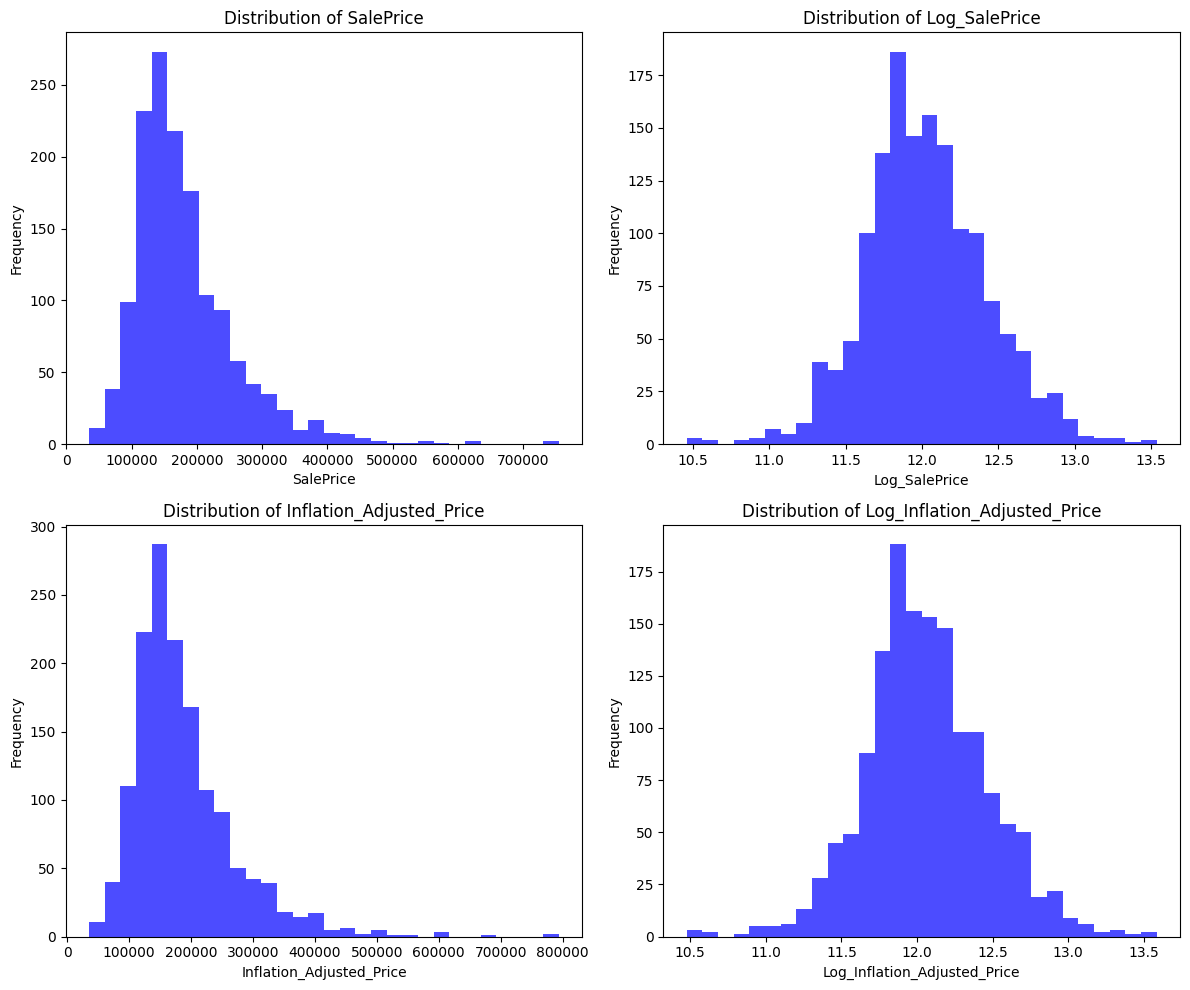

In [74]:
ames_data['Log_SalePrice'] = np.log1p(ames_data['SalePrice'])  # log1p handles zeros gracefully
ames_data['Log_Inflation_Adjusted_Price'] = np.log1p(ames_data['Inflation_Adjusted_Price'])

# Visualize the transformed distributions
features_to_plot = ['SalePrice', 'Log_SalePrice', 'Inflation_Adjusted_Price', 'Log_Inflation_Adjusted_Price']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, feature in enumerate(features_to_plot):
    axes[i].hist(ames_data[feature], bins=30, color='blue', alpha=0.7)
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

#### SalePrice
- Before transformation: Slight right skewness.
- After transformation (Log_SalePrice): The distribution is more centered and symmetric.

#### Inflation_Adjusted_Price:
- Before transformation: Similar to SalePrice, with slight skewness.
- After transformation (Log_Inflation_Adjusted_Price): Now appears approximately normal.

In [75]:
## Checking Skewness

In [76]:
from scipy.stats import skew

# List of features to analyze
top_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 
                'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 
                'YearBuilt', 'YearRemodAdd', 'House_Age']

# Calculate skewness
skewness_values = ames_data[top_features].apply(skew).sort_values(ascending=False)
print("Skewness of Top Positively Correlated Features and House_Age:\n")
print(skewness_values)

Skewness of Top Positively Correlated Features and House_Age:

TotalBsmtSF     1.522688
1stFlrSF        1.375342
GrLivArea       1.365156
TotRmsAbvGrd    0.675646
House_Age       0.608404
OverallQual     0.216721
GarageArea      0.179796
FullBath        0.036524
GarageCars     -0.342197
YearRemodAdd   -0.503044
YearBuilt      -0.612831
dtype: float64


In [77]:
# Apply log transformation to skewed features
skewed_features = ['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'House_Age']

for feature in skewed_features:
    # Handle zeros by adding a small constant before log transformation
    ames_data[f'Log_{feature}'] = ames_data[feature].apply(lambda x: np.log1p(x))

# Check the transformed features
print("Log-transformed features added to the dataset:\n")
print(ames_data[[f'Log_{feature}' for feature in skewed_features]].head())

Log-transformed features added to the dataset:

   Log_TotalBsmtSF  Log_1stFlrSF  Log_GrLivArea  Log_TotRmsAbvGrd  \
0         6.753438      6.753438       7.444833          2.197225   
1         7.141245      7.141245       7.141245          1.945910   
2         6.825460      6.825460       7.488294          1.945910   
3         6.629363      6.869014       7.448916          2.079442   
4         7.044033      7.044033       7.695758          2.302585   

   Log_House_Age  
0       1.791759  
1       3.465736  
2       2.079442  
3       4.521789  
4       2.197225  


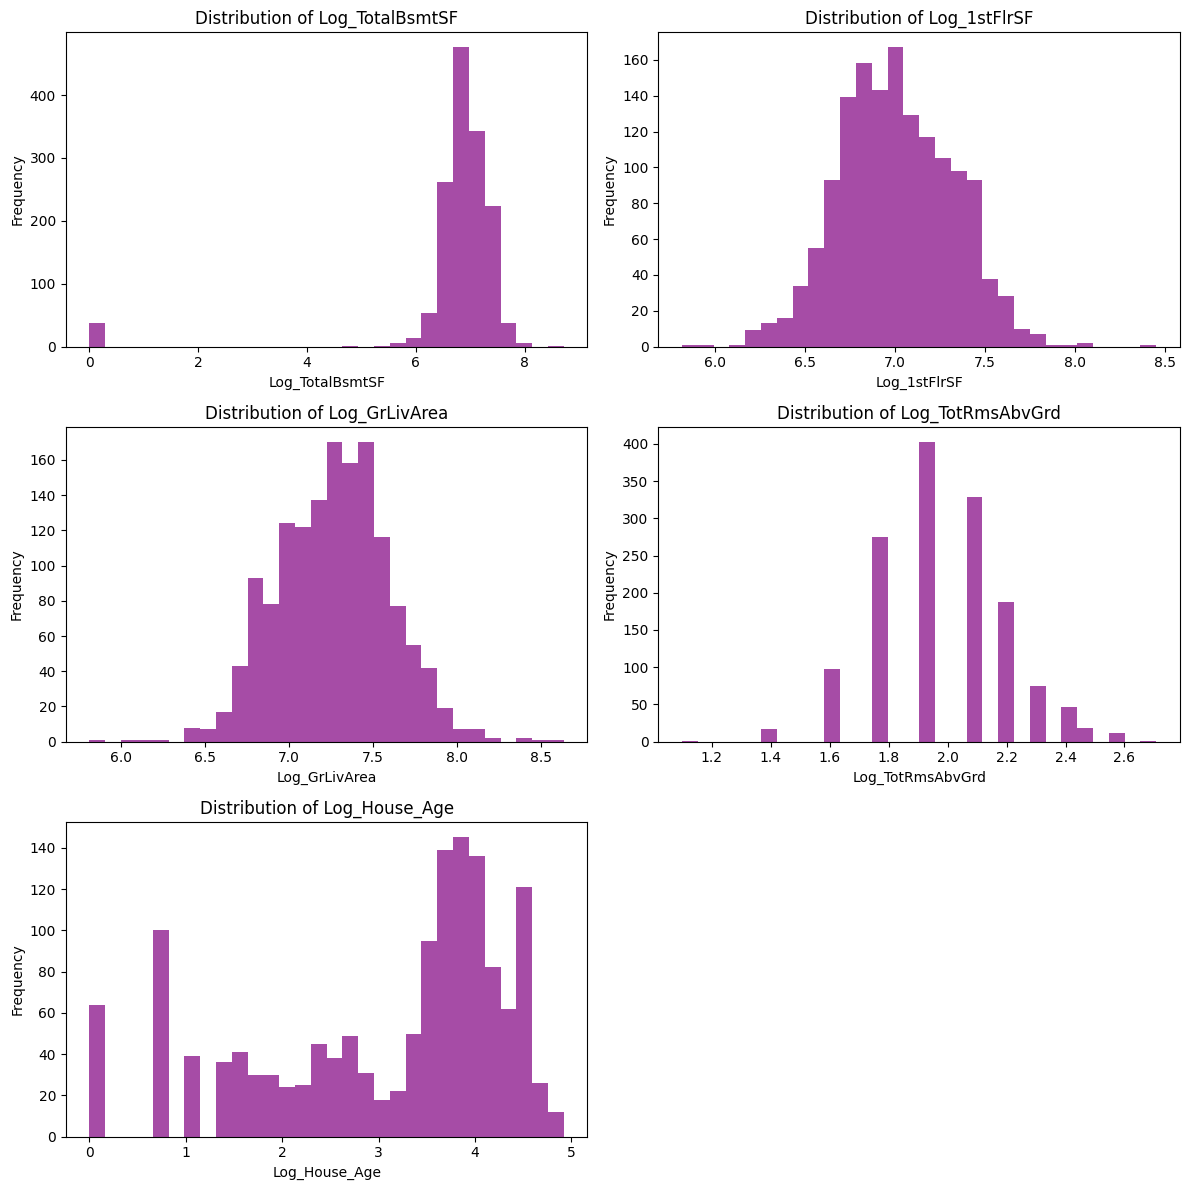

In [78]:
# Visualize the distributions of the log-transformed features
import matplotlib.pyplot as plt

log_features = ['Log_TotalBsmtSF', 'Log_1stFlrSF', 'Log_GrLivArea', 'Log_TotRmsAbvGrd', 'Log_House_Age']

fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.ravel()

for i, feature in enumerate(log_features):
    axes[i].hist(ames_data[feature], bins=30, color='purple', alpha=0.7)
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")

# Remove the empty subplot if the number of plots is odd
if len(log_features) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

In [79]:
print(ames_data.head(5).T)

                                          0             1             2  \
Id                                        1             2             3   
MSSubClass                               60            20            60   
MSZoning                                 RL            RL            RL   
LotFrontage                            65.0          80.0          68.0   
LotArea                                8450          9600         11250   
Street                                 Pave          Pave          Pave   
LotShape                                Reg           Reg           IR1   
LandContour                             Lvl           Lvl           Lvl   
Utilities                            AllPub        AllPub        AllPub   
LotConfig                            Inside           FR2        Inside   
LandSlope                               Gtl           Gtl           Gtl   
Neighborhood                        CollgCr       Veenker       CollgCr   
Condition1               

Now, let's reccompute the correlation!

In [80]:
# Recompute correlations with transformed features
log_transformed_features = ['Log_TotalBsmtSF', 'Log_1stFlrSF', 'Log_GrLivArea', 'Log_TotRmsAbvGrd', 'Log_House_Age']
correlation_matrix = ames_data[log_transformed_features + ['SalePrice', 'Inflation_Adjusted_Price']].corr()

# Extract correlations with SalePrice and Inflation_Adjusted_Price
saleprice_correlations = correlation_matrix['SalePrice'].sort_values(ascending=False)
inflation_price_correlations = correlation_matrix['Inflation_Adjusted_Price'].sort_values(ascending=False)

# Display updated correlations
print("Updated Correlations with SalePrice:")
print(saleprice_correlations)

print("\nUpdated Correlations with Inflation_Adjusted_Price:")
print(inflation_price_correlations)

Updated Correlations with SalePrice:
SalePrice                   1.000000
Inflation_Adjusted_Price    0.997555
Log_GrLivArea               0.695147
Log_1stFlrSF                0.591299
Log_TotRmsAbvGrd            0.522355
Log_TotalBsmtSF             0.325883
Log_House_Age              -0.572626
Name: SalePrice, dtype: float64

Updated Correlations with Inflation_Adjusted_Price:
Inflation_Adjusted_Price    1.000000
SalePrice                   0.997555
Log_GrLivArea               0.694531
Log_1stFlrSF                0.589588
Log_TotRmsAbvGrd            0.522211
Log_TotalBsmtSF             0.325153
Log_House_Age              -0.577335
Name: Inflation_Adjusted_Price, dtype: float64


In [81]:
# Combine original and transformed features for analysis
features_to_analyze = ['OverallQual', 'GarageArea', 'FullBath', 'GarageCars', 
                        'YearRemodAdd', 'YearBuilt', 'Log_TotalBsmtSF', 
                        'Log_1stFlrSF', 'Log_GrLivArea', 'Log_TotRmsAbvGrd', 
                        'Log_House_Age', 'SalePrice', 'Inflation_Adjusted_Price']

# Recompute correlation matrix
correlation_matrix = ames_data[features_to_analyze].corr()

# Extract correlations with SalePrice and Inflation_Adjusted_Price
saleprice_correlations = correlation_matrix['SalePrice'].sort_values(ascending=False)
inflation_price_correlations = correlation_matrix['Inflation_Adjusted_Price'].sort_values(ascending=False)

# Display updated correlations
print("Updated Correlations with SalePrice (Original + Transformed Features):")
print(saleprice_correlations)

print("\nUpdated Correlations with Inflation_Adjusted_Price (Original + Transformed Features):")
print(inflation_price_correlations)

Updated Correlations with SalePrice (Original + Transformed Features):
SalePrice                   1.000000
Inflation_Adjusted_Price    0.997555
OverallQual                 0.790982
Log_GrLivArea               0.695147
GarageCars                  0.640409
GarageArea                  0.623431
Log_1stFlrSF                0.591299
FullBath                    0.560664
YearBuilt                   0.522897
Log_TotRmsAbvGrd            0.522355
YearRemodAdd                0.507101
Log_TotalBsmtSF             0.325883
Log_House_Age              -0.572626
Name: SalePrice, dtype: float64

Updated Correlations with Inflation_Adjusted_Price (Original + Transformed Features):
Inflation_Adjusted_Price    1.000000
SalePrice                   0.997555
OverallQual                 0.788468
Log_GrLivArea               0.694531
GarageCars                  0.640219
GarageArea                  0.621600
Log_1stFlrSF                0.589588
FullBath                    0.560224
Log_TotRmsAbvGrd            0.522

##### Strong Correlations ( > 0.6):

- OverallQual: Still the strongest original feature correlated with both SalePrice (0.79) and Inflation_Adjusted_Price (0.78).
- Log_GrLivArea: Strong correlation with both SalePrice (0.69) and Inflation_Adjusted_Price (0.69).

##### Moderate Correlations (0.5–0.6):

- GarageCars and GarageArea: Reflect the importance of parking and garage size.
- Log_1stFlrSF: Correlation slightly weaker than OverallQual but still significant.
- FullBath: Moderate positive correlation (0.56).

##### Other Positive Contributors:
- YearBuilt and YearRemodAdd: These features reflect the age and modernization of the house, which moderately affect prices.

#### Negatively Correlated Features:
- Log_House_Age: Strong negative correlation with SalePrice (-0.57) and Inflation_Adjusted_Price (-0.57). This confirms that older houses generally have lower prices.

Let's work on scatterplot!

In [82]:
### Scatterplots

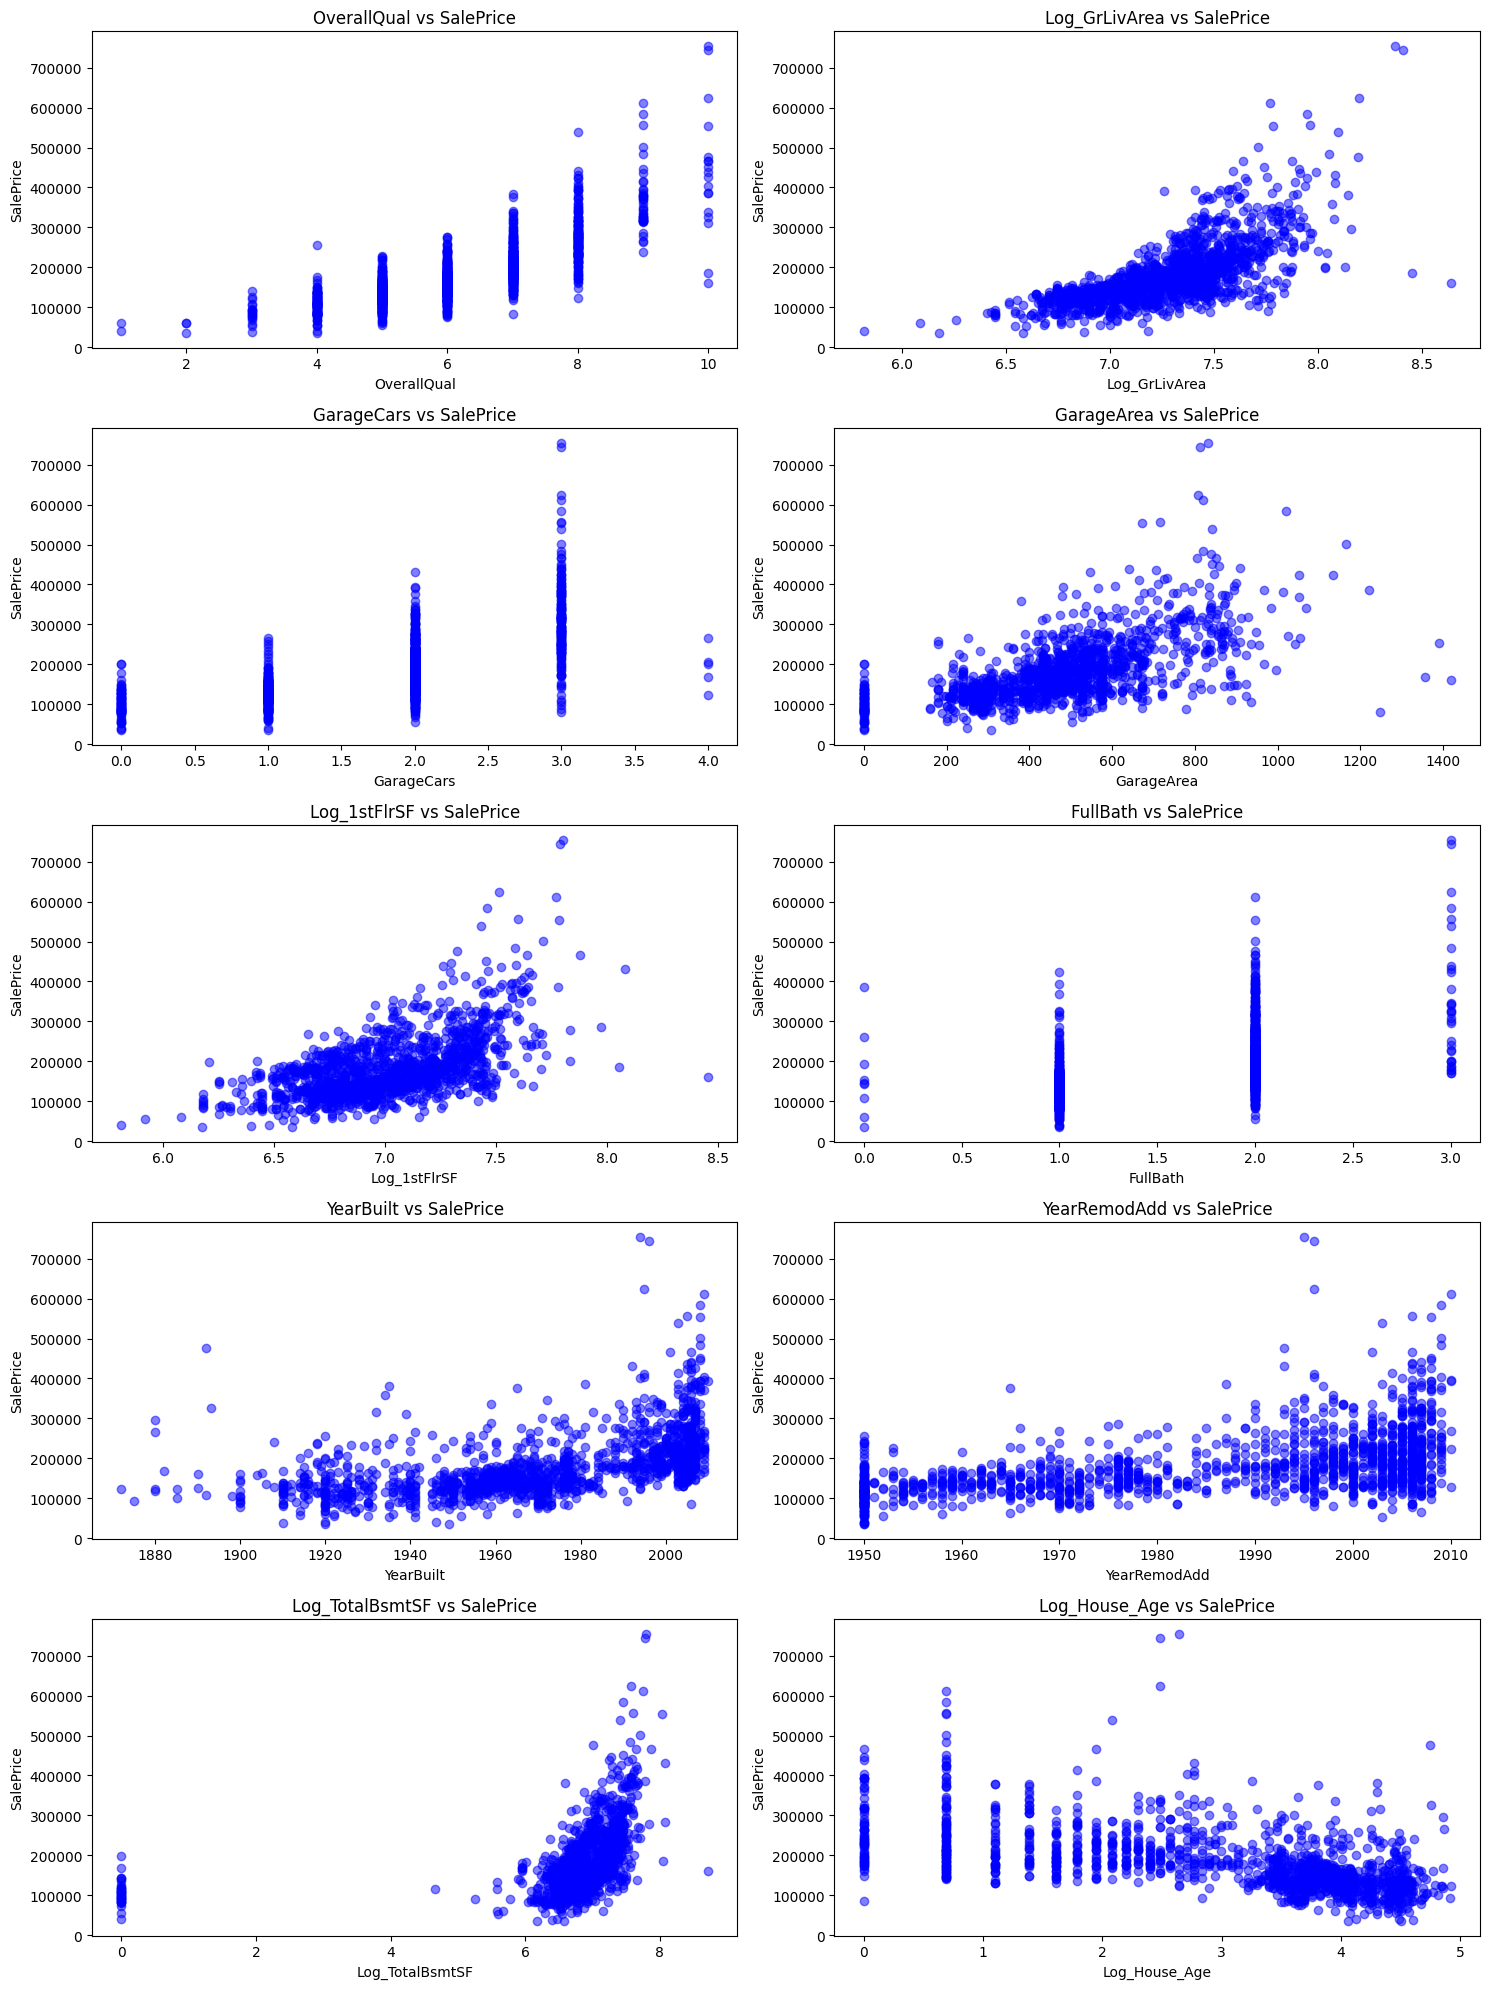

In [83]:
import matplotlib.pyplot as plt

# Features to visualize
selected_features = ['OverallQual', 'Log_GrLivArea', 'GarageCars', 'GarageArea', 
                     'Log_1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 
                     'Log_TotalBsmtSF', 'Log_House_Age']

# Create scatterplots
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.ravel()

for i, feature in enumerate(selected_features):
    axes[i].scatter(ames_data[feature], ames_data['SalePrice'], alpha=0.5, c='blue')
    axes[i].set_title(f"{feature} vs SalePrice")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('SalePrice')

plt.tight_layout()
plt.show()

- OverallQual: Strong positive correlation with SalePrice.
- Log_GrLivArea: Larger living areas positively impact price; log transformation stabilized outliers.
- GarageCars & GarageArea: Positive trends with price, but some saturation for higher values.
- Log_1stFlrSF & Log_TotalBsmtSF: Larger spaces are valued; transformation improved distributions.
- FullBath: Moderate positive impact.
- YearBuilt & YearRemodAdd: Newer/remodeled homes fetch higher prices.
- Log_House_Age: Older homes show declining prices

### Outlier Analysis Using Boxplots

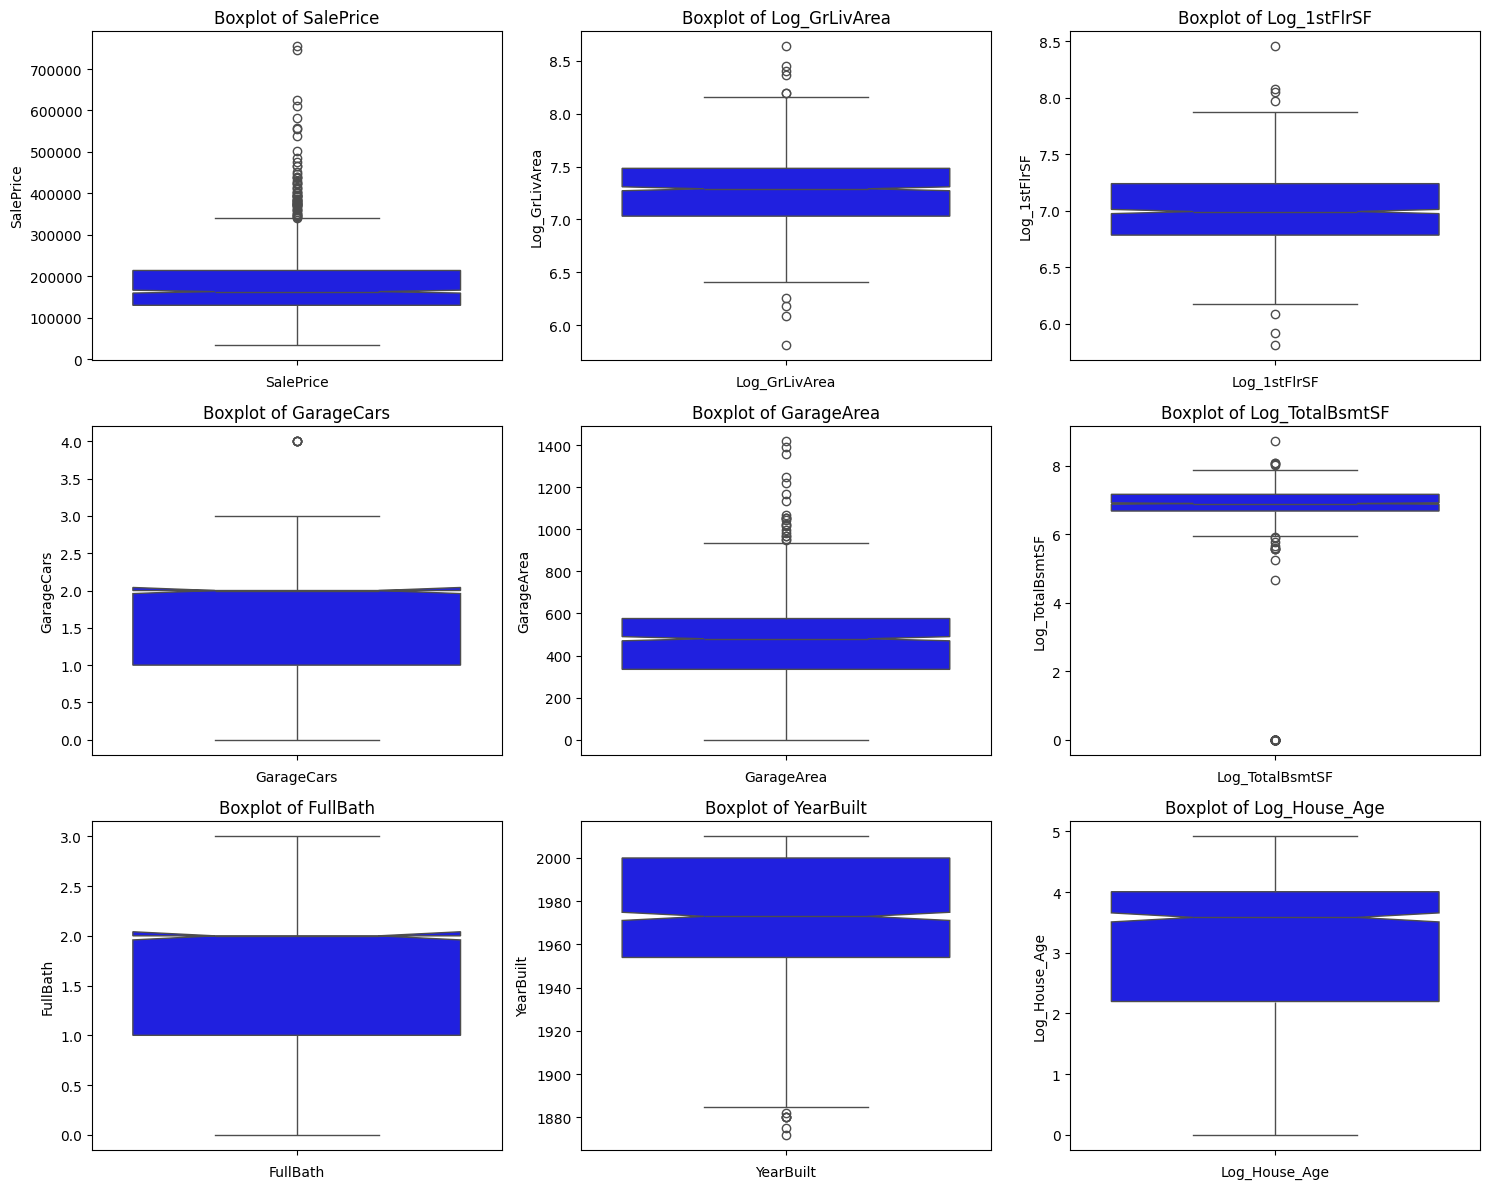

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Features to analyze for outliers
features_to_check = ['SalePrice', 'Log_GrLivArea', 'Log_1stFlrSF', 
                     'GarageCars', 'GarageArea', 'Log_TotalBsmtSF', 
                     'FullBath', 'YearBuilt', 'Log_House_Age']

# Plot boxplots for each feature
plt.figure(figsize=(15, 12))
for i, feature in enumerate(features_to_check, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=ames_data[feature], color='blue', notch=True)
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

- SalePrice: Significant outliers are present, particularly in the higher price range.
- Log_GrLivArea: Few outliers exist, suggesting homes with unusually high above-ground living area.
- Log_1stFlrSF: Outliers are minimal, but there are some homes with larger-than-average first floor areas.
- GarageCars: A single notable outlier exists with more than 3 cars.
- GarageArea: Outliers are more pronounced, indicating garages significantly larger than typical ones.
- Log_TotalBsmtSF: Outliers exist, indicating homes with much larger basement areas.
- FullBath: Distribution is compact with no significant outliers.
- YearBuilt: Slightly skewed; older homes might be considered outliers.
- Log_House_Age: Outliers are concentrated in older houses.

### Outlier Removal (Capping/Trimming)

In [85]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Apply capping for selected features
features_to_cap = ['SalePrice', 'Log_GrLivArea', 'GarageArea', 'Log_TotalBsmtSF']
for feature in features_to_cap:
    ames_data = cap_outliers(ames_data, feature)

print("Outlier handling applied to the selected features.")

Outlier handling applied to the selected features.


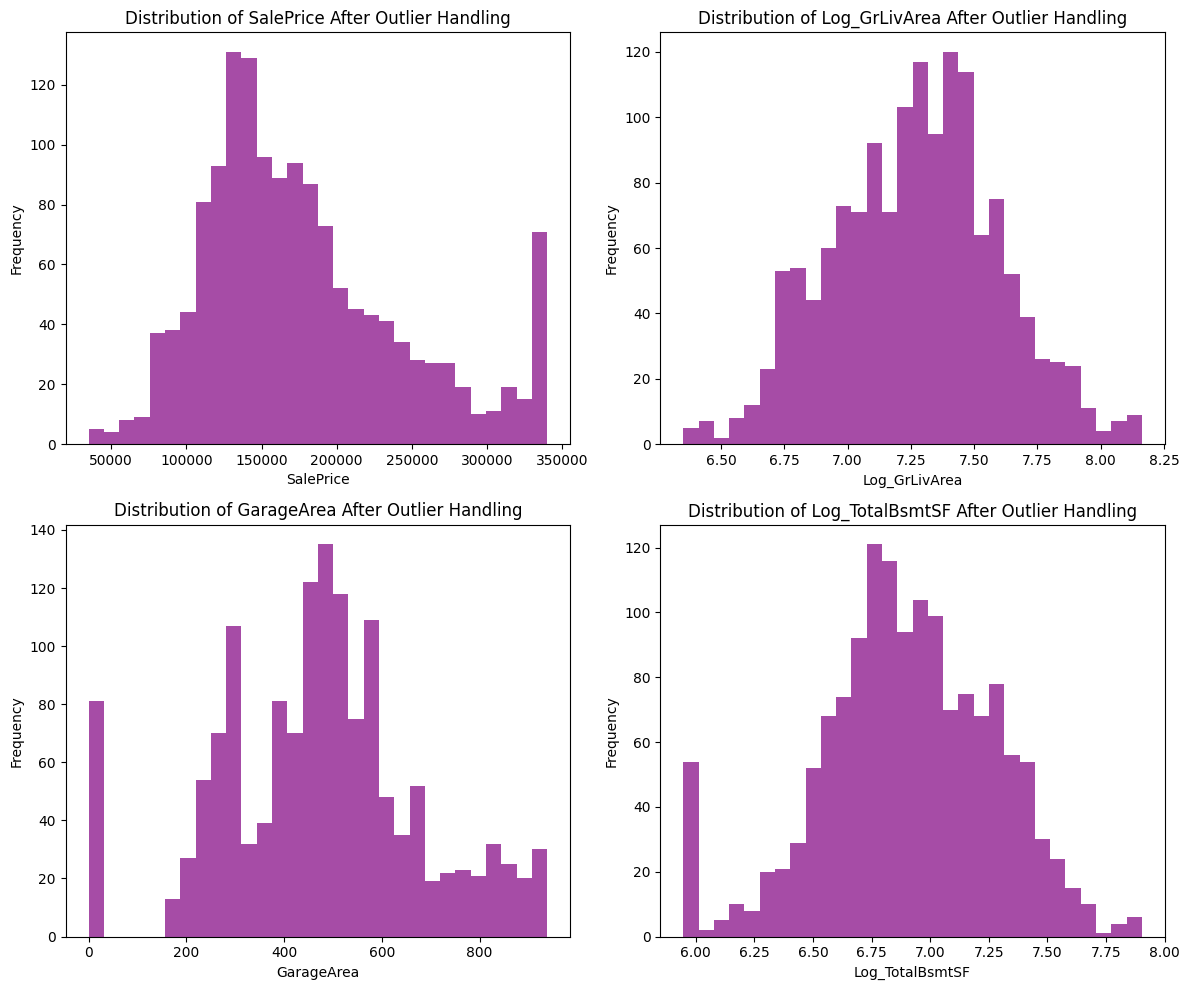

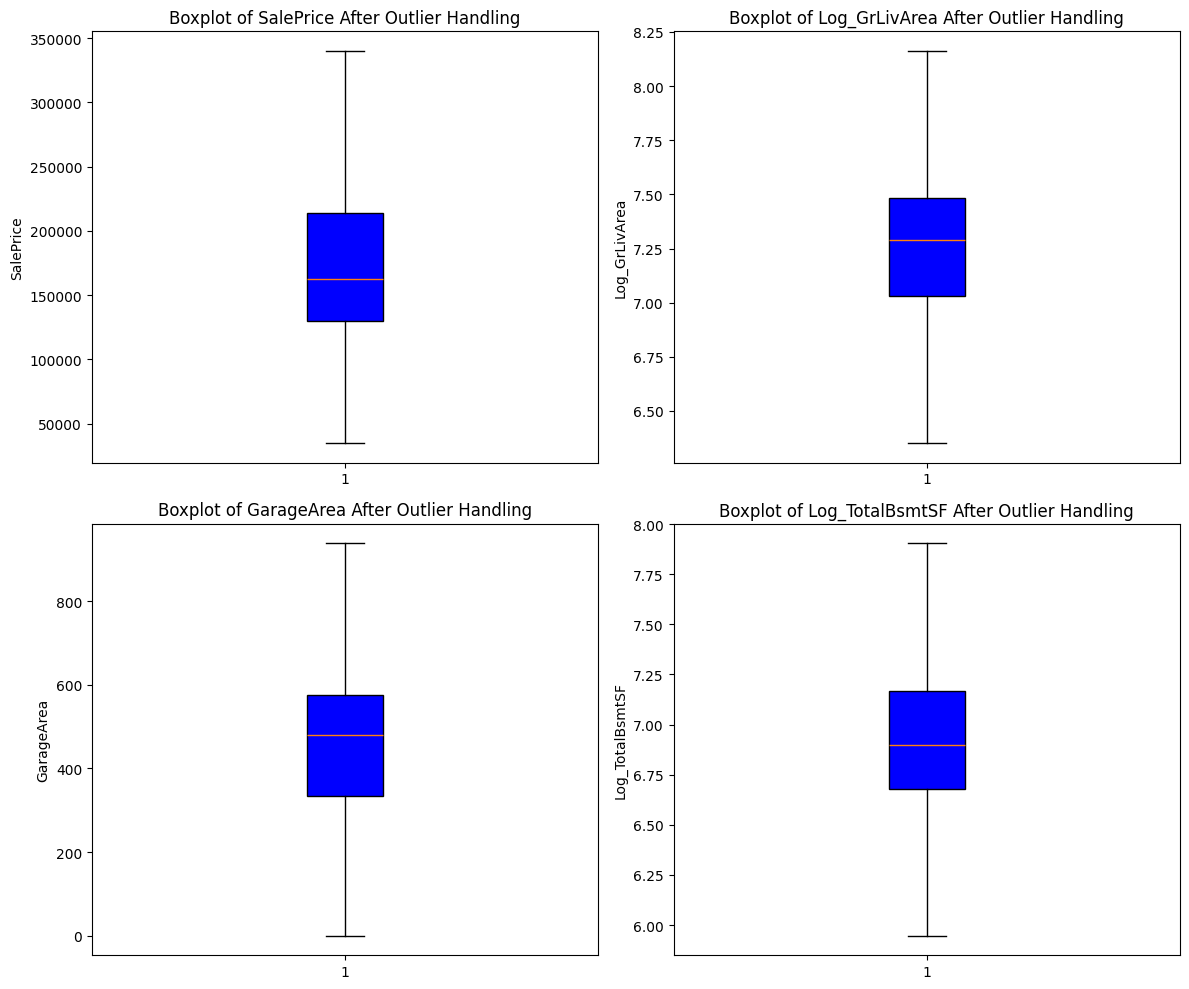

In [86]:
import matplotlib.pyplot as plt

features_to_plot = ['SalePrice', 'Log_GrLivArea', 'GarageArea', 'Log_TotalBsmtSF']

# Distribution plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()
for i, feature in enumerate(features_to_plot):
    axes[i].hist(ames_data[feature], bins=30, color='purple', alpha=0.7)
    axes[i].set_title(f"Distribution of {feature} After Outlier Handling")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# Boxplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()
for i, feature in enumerate(features_to_plot):
    axes[i].boxplot(ames_data[feature], patch_artist=True, boxprops=dict(facecolor="blue", color="black"))
    axes[i].set_title(f"Boxplot of {feature} After Outlier Handling")
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

### PCA for feature Reduction (Optional)

In [87]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Features for PCA (numeric columns only)
features_for_pca = ['Log_GrLivArea', 'Log_1stFlrSF', 'Log_TotalBsmtSF', 'GarageArea',
                    'GarageCars', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'FullBath', 'Log_House_Age']

# Normalize the features
scaler = StandardScaler()
normalized_data = scaler.fit_transform(ames_data[features_for_pca])

# Apply PCA
pca = PCA(n_components=5)  # Adjust n_components as needed
pca_results = pca.fit_transform(normalized_data)

# PCA Explained Variance
explained_variance = pca.explained_variance_ratio_

# Add PCA components back to the dataset for analysis
for i in range(pca.n_components):
    ames_data[f'PCA_Component_{i+1}'] = pca_results[:, i]

# Display Explained Variance
print("Explained Variance Ratio for Each Component:", explained_variance)

Explained Variance Ratio for Each Component: [0.54099518 0.14007026 0.09155413 0.08218329 0.04583997]


The cumulative variance explained by the top two components is about 68% (54.1% + 14.0%), and by the top three components, it reaches 77.3%. This suggests we could retain 2 or 3 components for dimensionality reduction while preserving most of the dataset's variance.

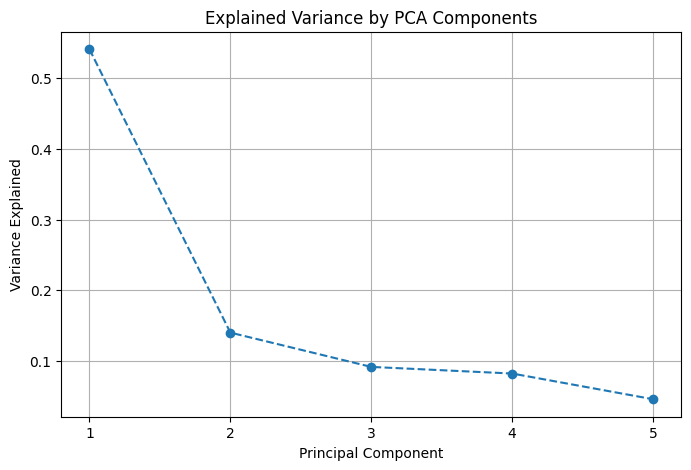

In [88]:
import matplotlib.pyplot as plt

# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()

### Model Building

In [89]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select features and new target variable
features = ['OverallQual', 'Log_GrLivArea', 'GarageCars', 'GarageArea', 'Log_1stFlrSF',
            'FullBath', 'YearBuilt', 'Log_TotRmsAbvGrd', 'YearRemodAdd', 'Log_House_Age']
target = 'Log_Inflation_Adjusted_Price'  # Log-transformed Inflation-Adjusted Price

# Split the data
X = ames_data[features]
y = ames_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Baseline Linear Regression (Log_Inflation_Adjusted_Price):")
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

Baseline Linear Regression (Log_Inflation_Adjusted_Price):
MAE: 0.13, RMSE: 0.18, R²: 0.84


##### The baseline Linear Regression model performs decently with:
- MAE (0.13): On average, the model's predictions are 0.13 log-units off from the actual Log_Inflation_Adjusted_Price. In terms of the actual price, this translates to moderate errors.
- RMSE (0.18): The model's predictions deviate by 0.18 log-units on average, accounting for larger errors more heavily. This shows a reasonable fit but room for improvement.
- R² (0.84): The model explains 84% of the variance in Log_Inflation_Adjusted_Price, indicating a strong baseline model.l.

### Ridge and Lasso Regression

- Ridge regression: Handles multicollinearity by penalizing large coefficients and improves stability.
- Lasso Regression: Performs both regularization and feature selection by shrinking some coefficients to zero.

#### Ridge Regression

In [90]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Ridge Regression with Hyperparameter Tuning
ridge_params = {'alpha': [0.1, 1, 10, 50, 100, 200]}
ridge_model = Ridge()
ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train, y_train)

# Best Ridge Model
best_ridge = ridge_grid.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)

# Evaluate Ridge Regression
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_rmse = mean_squared_error(y_test, y_pred_ridge, squared=False)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print(f"Best Ridge Alpha: {ridge_grid.best_params_['alpha']}")
print(f"Ridge Regression:")
print(f"MAE: {ridge_mae:.2f}, RMSE: {ridge_rmse:.2f}, R²: {ridge_r2:.2f}")

Best Ridge Alpha: 0.1
Ridge Regression:
MAE: 0.13, RMSE: 0.18, R²: 0.84


- Best Alpha (0.1): This indicates the optimal penalty strength to balance regularization and model performance.
- MAE (0.13): Similar to the baseline, suggesting that Ridge did not drastically improve predictive accuracy in terms of average error.
- RMSE (0.18): Again, no major change compared to the baseline.
- R² (0.84): The explained variance remains at 84%, showing that Ridge Regression performs similarly to the baseline linear regression in this case.

Ridge Regression does not show significant improvement over the baseline model, likely because the data already has minimal multicollinearity or is well-regularized inherently.

#### Lasso Regression

In [91]:
from sklearn.linear_model import Lasso

# Lasso Regression with Hyperparameter Tuning
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 50, 100]}
lasso_model = Lasso(max_iter=10000)
lasso_grid = GridSearchCV(lasso_model, lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train, y_train)

# Best Lasso Model
best_lasso = lasso_grid.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)

# Evaluate Lasso Regression
lasso_mae = mean_absolute_error(y_test, y_pred_lasso)
lasso_rmse = mean_squared_error(y_test, y_pred_lasso, squared=False)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print(f"Best Lasso Alpha: {lasso_grid.best_params_['alpha']}")
print(f"Lasso Regression:")
print(f"MAE: {lasso_mae:.2f}, RMSE: {lasso_rmse:.2f}, R²: {lasso_r2:.2f}")

Best Lasso Alpha: 0.01
Lasso Regression:
MAE: 0.13, RMSE: 0.19, R²: 0.82


- Lasso Regression did not outperform Ridge Regression or the baseline linear model.

#### Elastic Net Regression

In [92]:
from sklearn.linear_model import ElasticNet

# Elastic Net Regression with Hyperparameter Tuning
elastic_params = {
    'alpha': [0.01, 0.1, 1, 10, 50, 100],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]  # Balance between Lasso (1.0) and Ridge (0.0)
}
elastic_model = ElasticNet(max_iter=10000)
elastic_grid = GridSearchCV(elastic_model, elastic_params, cv=5, scoring='r2')
elastic_grid.fit(X_train, y_train)

# Best Elastic Net Model
best_elastic = elastic_grid.best_estimator_
y_pred_elastic = best_elastic.predict(X_test)

# Evaluate Elastic Net Regression
elastic_mae = mean_absolute_error(y_test, y_pred_elastic)
elastic_rmse = mean_squared_error(y_test, y_pred_elastic, squared=False)
elastic_r2 = r2_score(y_test, y_pred_elastic)

print(f"Best Elastic Net Parameters: {elastic_grid.best_params_}")
print(f"Elastic Net Regression:")
print(f"MAE: {elastic_mae:.2f}, RMSE: {elastic_rmse:.2f}, R²: {elastic_r2:.2f}")

Best Elastic Net Parameters: {'alpha': 0.01, 'l1_ratio': 0.1}
Elastic Net Regression:
MAE: 0.13, RMSE: 0.18, R²: 0.84


Elastic Net Regression performs as well as Ridge Regression while allowing minor feature selection via its Lasso component.
Given the high similarity in performance across these models, Elastic Net offers flexibility in balancing Ridge and Lasso penalties but doesn’t provide a significant performance advantage over Ridge Regression.

#### Ensemble Methods

##### Random Forest Regression

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Random Forest with Hyperparameter Tuning
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='r2', n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Best Random Forest Model
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Evaluate Random Forest Regression
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"Best Random Forest Parameters: {rf_grid.best_params_}")
print(f"Random Forest Regression:")
print(f"MAE: {rf_mae:.2f}, RMSE: {rf_rmse:.2f}, R²: {rf_r2:.2f}")

Best Random Forest Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Random Forest Regression:
MAE: 0.12, RMSE: 0.17, R²: 0.84


Random Forest captures non-linear relationships without degrading performance.
The model performs comparably to linear models while potentially offering better interpretability through feature importances.

### Gradient Boosting (Using XGBoost)

In [94]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Gradient Boosting with Hyperparameter Tuning
gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
gb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
gb_grid = GridSearchCV(gb_model, gb_params, cv=5, scoring='r2', n_jobs=-1)
gb_grid.fit(X_train, y_train)

# Best Gradient Boosting Model
best_gb = gb_grid.best_estimator_
y_pred_gb = best_gb.predict(X_test)

# Evaluate Gradient Boosting
gb_mae = mean_absolute_error(y_test, y_pred_gb)
gb_rmse = mean_squared_error(y_test, y_pred_gb, squared=False)
gb_r2 = r2_score(y_test, y_pred_gb)

print(f"Best Gradient Boosting Parameters: {gb_grid.best_params_}")
print(f"Gradient Boosting Regression:")
print(f"MAE: {gb_mae:.2f}, RMSE: {gb_rmse:.2f}, R²: {gb_r2:.2f}")

Best Gradient Boosting Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Gradient Boosting Regression:
MAE: 0.12, RMSE: 0.17, R²: 0.84


Best Parameters:
- colsample_bytree: 0.8: Uses 80% of features for each tree, balancing accuracy and overfitting.
- learning_rate: 0.1: The step size in updating predictions for better convergence.
- max_depth: 3: Shallow trees prevent overfitting while capturing essential patterns.
- n_estimators: 200: Optimized number of boosting rounds for convergence.
- subsample: 0.8: Utilizes 80% of the training data for each tree, adding diversity.

Performance Metrics:
- MAE (0.12): Matches Random Forest and Linear Regression models.
- RMSE (0.17): Comparable to the best-performing models.
- R² (0.84): High, suggesting strong explanatory power.

#### Summary of the Models

In [95]:
import pandas as pd

# Model results
model_results = {
    'Model': [
        'Baseline Linear Regression',
        'Ridge Regression',
        'Lasso Regression',
        'Elastic Net',
        'Random Forest',
        'Gradient Boosting'
    ],
    'MAE': [0.13, 0.13, 0.13, 0.13, 0.12, 0.12],
    'RMSE': [0.18, 0.18, 0.19, 0.18, 0.17, 0.17],
    'R²': [0.84, 0.84, 0.82, 0.84, 0.84, 0.84]
}

# Create a DataFrame
results_df = pd.DataFrame(model_results)

# Display the DataFrame
print("Model Results Summary:")
print(results_df)

Model Results Summary:
                        Model   MAE  RMSE    R²
0  Baseline Linear Regression  0.13  0.18  0.84
1            Ridge Regression  0.13  0.18  0.84
2            Lasso Regression  0.13  0.19  0.82
3                 Elastic Net  0.13  0.18  0.84
4               Random Forest  0.12  0.17  0.84
5           Gradient Boosting  0.12  0.17  0.84


- Both Random Forest and Gradient Boosting exhibit the best performance with the lowest MAE (0.12) and RMSE (0.17), while maintaining an R² of 0.84. These models may be considered optimal for the task due to their high accuracy and robustness.

- The Baseline Linear Regression model performs reasonably well (MAE: 0.13, RMSE: 0.18, R²: 0.84). This establishes a solid baseline for comparison with more complex models.

- Ridge Regression and Elastic Net perform on par with the baseline, suggesting limited benefit from regularization in this case.
- Lasso Regression, with a slightly lower R² (0.82), indicates potential underperformance due to overly sparse feature selection.

##### Unifide Code to Convert Predictions Back

In [96]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define a function to evaluate models on the original scale
def evaluate_model_on_original_scale(model, X_test, y_test, model_name):
    # Predict log-transformed prices
    log_predictions = model.predict(X_test)
    
    # Convert log-transformed predictions and actual values back to original scale
    actual_predicted_price = np.exp(log_predictions)
    actual_y_test = np.exp(y_test)
    
    # Calculate metrics on the original scale
    mae_actual = mean_absolute_error(actual_y_test, actual_predicted_price)
    rmse_actual = mean_squared_error(actual_y_test, actual_predicted_price, squared=False)
    
    # Display results
    print(f"{model_name}:")
    print(f"Mean Absolute Error (Original Scale): ${mae_actual:,.2f}")
    print(f"Root Mean Squared Error (Original Scale): ${rmse_actual:,.2f}")
    print("-" * 50)

# Evaluate all models on the original scale
evaluate_model_on_original_scale(lr_model, X_test, y_test, "Baseline Linear Regression")
evaluate_model_on_original_scale(best_ridge, X_test, y_test, "Ridge Regression")
evaluate_model_on_original_scale(best_lasso, X_test, y_test, "Lasso Regression")
evaluate_model_on_original_scale(best_elastic, X_test, y_test, "Elastic Net Regression")
evaluate_model_on_original_scale(best_rf, X_test, y_test, "Random Forest Regression")
evaluate_model_on_original_scale(best_gb, X_test, y_test, "Gradient Boosting Regression")

Baseline Linear Regression:
Mean Absolute Error (Original Scale): $23,111.02
Root Mean Squared Error (Original Scale): $38,838.00
--------------------------------------------------
Ridge Regression:
Mean Absolute Error (Original Scale): $23,110.38
Root Mean Squared Error (Original Scale): $38,837.67
--------------------------------------------------
Lasso Regression:
Mean Absolute Error (Original Scale): $23,990.90
Root Mean Squared Error (Original Scale): $41,647.27
--------------------------------------------------
Elastic Net Regression:
Mean Absolute Error (Original Scale): $23,116.67
Root Mean Squared Error (Original Scale): $39,216.30
--------------------------------------------------
Random Forest Regression:
Mean Absolute Error (Original Scale): $21,066.59
Root Mean Squared Error (Original Scale): $34,007.60
--------------------------------------------------
Gradient Boosting Regression:
Mean Absolute Error (Original Scale): $21,532.74
Root Mean Squared Error (Original Scale): 

- **Baseline Linear Regression**: Performs well with MAE and RMSE values in the 23k–38k range. This serves as the benchmark for comparison.
- **Ridge Regression**: Very similar performance to Linear Regression. The slight improvement in MAE and RMSE suggests that Ridge Regression handles the multicollinearity or regularization well in this context.
- **Lasso Regression**: Higher MAE and RMSE compared to Ridge and Linear Regression. It seems Lasso's feature selection led to a drop in predictive performance for this dataset.
- **Elastic Net Regression**: Performance lies between Ridge and Lasso. The balance between L1 and L2 penalties helps optimize performance but is slightly less effective compared to Ridge.
- **Random Forest Regression**: Performs significantly better than the linear models, with much lower MAE and RMSE values, indicating its ability to capture complex relationships in the data.
- **Gradient Boosting Regression**: Similar to Random Forest, Gradient Boosting performs well with slightly higher RMSE but still significantly better than the linear models. It may benefit from further hyperparameter tuning.

In [97]:
import pickle

# Save all models
models_to_save = {
    "Linear Regression": lr_model,
    "Ridge Regression": best_ridge,
    "Lasso Regression": best_lasso,
    "Elastic Net Regression": best_elastic,
    "Random Forest Regression": best_rf,
    "Gradient Boosting Regression": best_gb
}

for model_name, model in models_to_save.items():
    with open(f"{model_name.replace(' ', '_').lower()}.pkl", "wb") as file:
        pickle.dump(model, file)
print("All models have been saved successfully!")


All models have been saved successfully!
